# 문제정의
## 영화관객 수 예측
감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들고자 한다. 
- y:  box_off_num
- x: 영화 관객 수에 영향을 주는 요소들 (Data Set에서 columns)

### 데이터 불러오기

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('./movies_train.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [100]:
df.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083


1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [101]:
## 결측치를 찾음
df.isnull().sum()
## dir_prev_bfnum 에 결측치가 있음. 감독이 이전에 제작에 참여한 적이 없는 것 같음

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [102]:
df[df['dir_prev_bfnum'].isnull()]
# dir_prev_num에 0이 대입되어 있으니 dir_prev_bfnum에 0을 집어넣음 

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [103]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0)

In [104]:
df.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [105]:
###release_time을 year, month로 따로 컬럼을 만들어줌
df['release_time'] = pd.to_datetime(df['release_time'])
df['year'] = df['release_time'].apply(lambda x: x.year)
df['month'] = df['release_time'].apply(lambda x: x.month)

In [106]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387,2010,11


### 종속변수 탐색

In [107]:
pd.options.display.float_format = '{:.5f}'.format
# 지수표현식이 아닌 실수표현으로 보기 위한 설정

In [108]:
# 종속변수의 기초통계량을 살펴봄
df['box_off_num'].describe()

count        600.00000
mean      708181.75167
std      1828005.85114
min            1.00000
25%         1297.25000
50%        12591.00000
75%       479886.75000
max     14262766.00000
Name: box_off_num, dtype: float64

<Axes: >

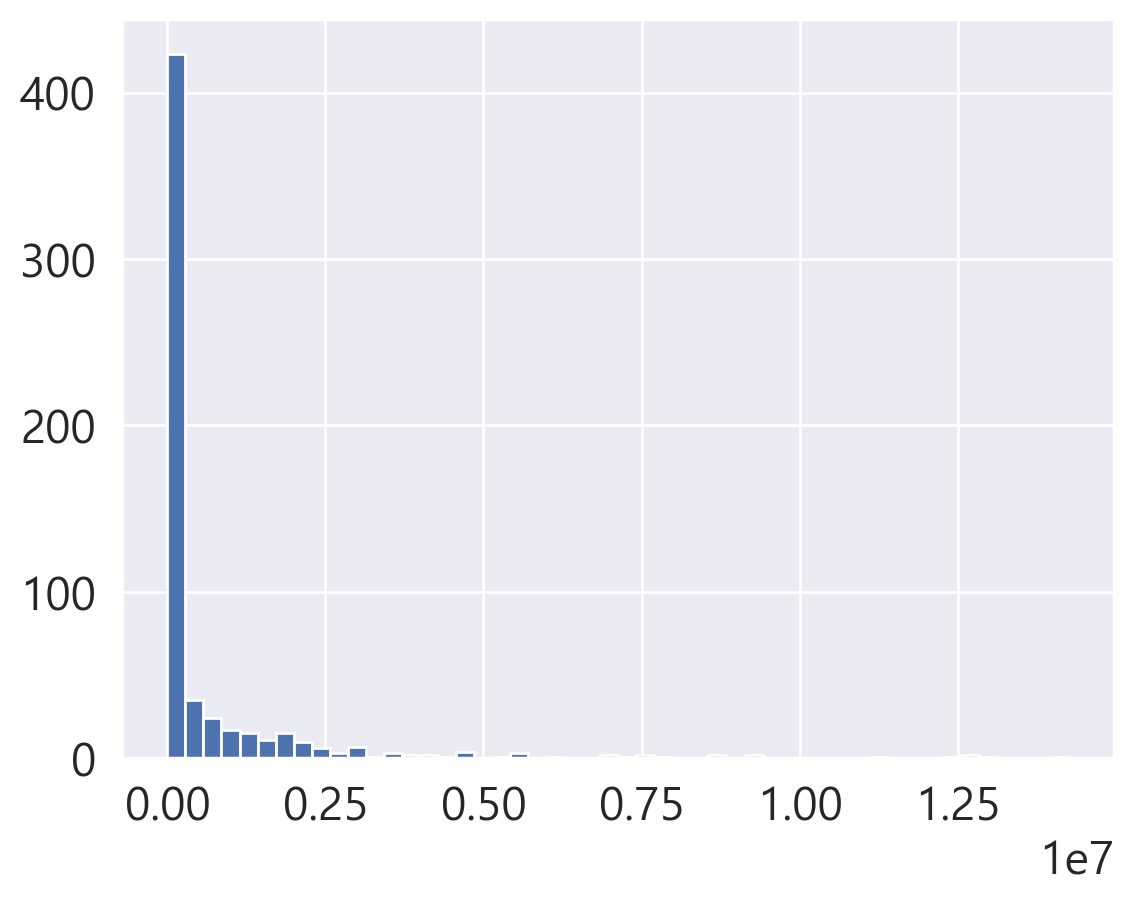

In [109]:
# 시각화
df['box_off_num'].hist(bins=50)

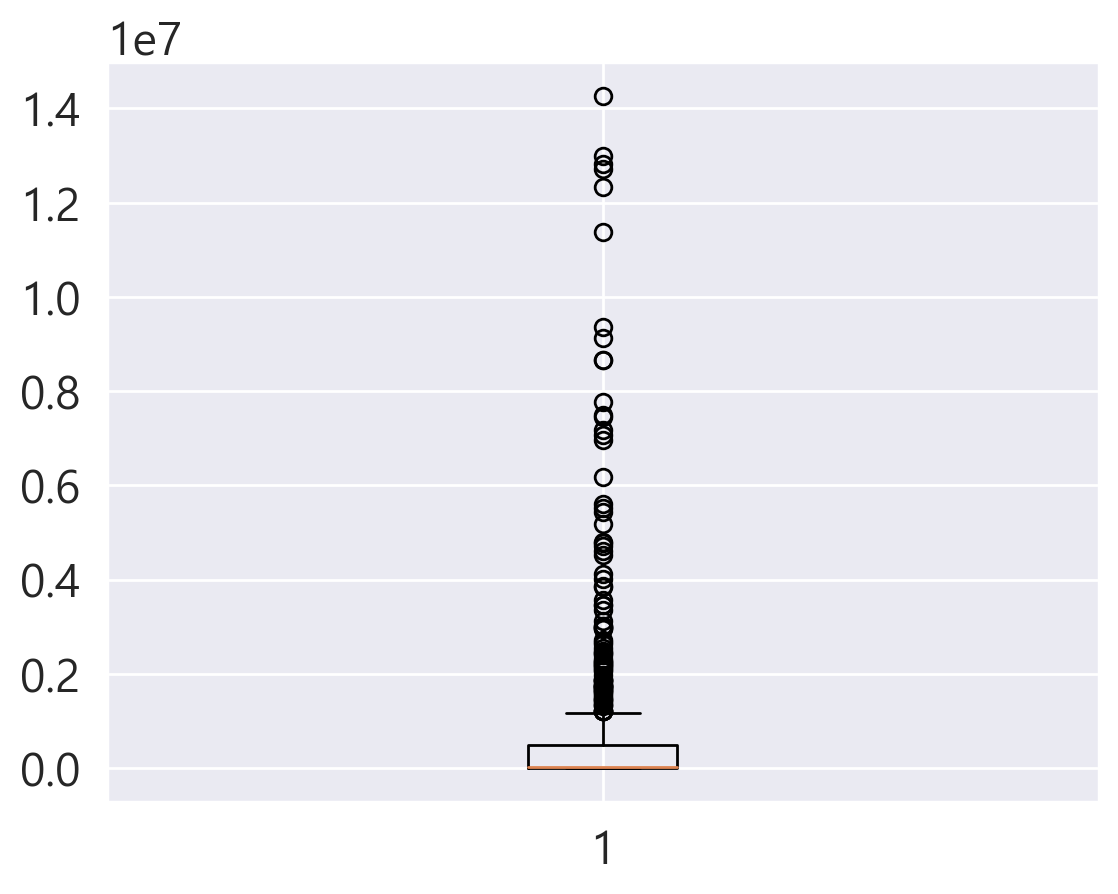

In [110]:
plt.boxplot(df['box_off_num'])
plt.show()
# 1부터 14,000,000 까지 다양한 관객수로 분포되어 있다. 

### 독립변수 살펴보기

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_21548\2492131507.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


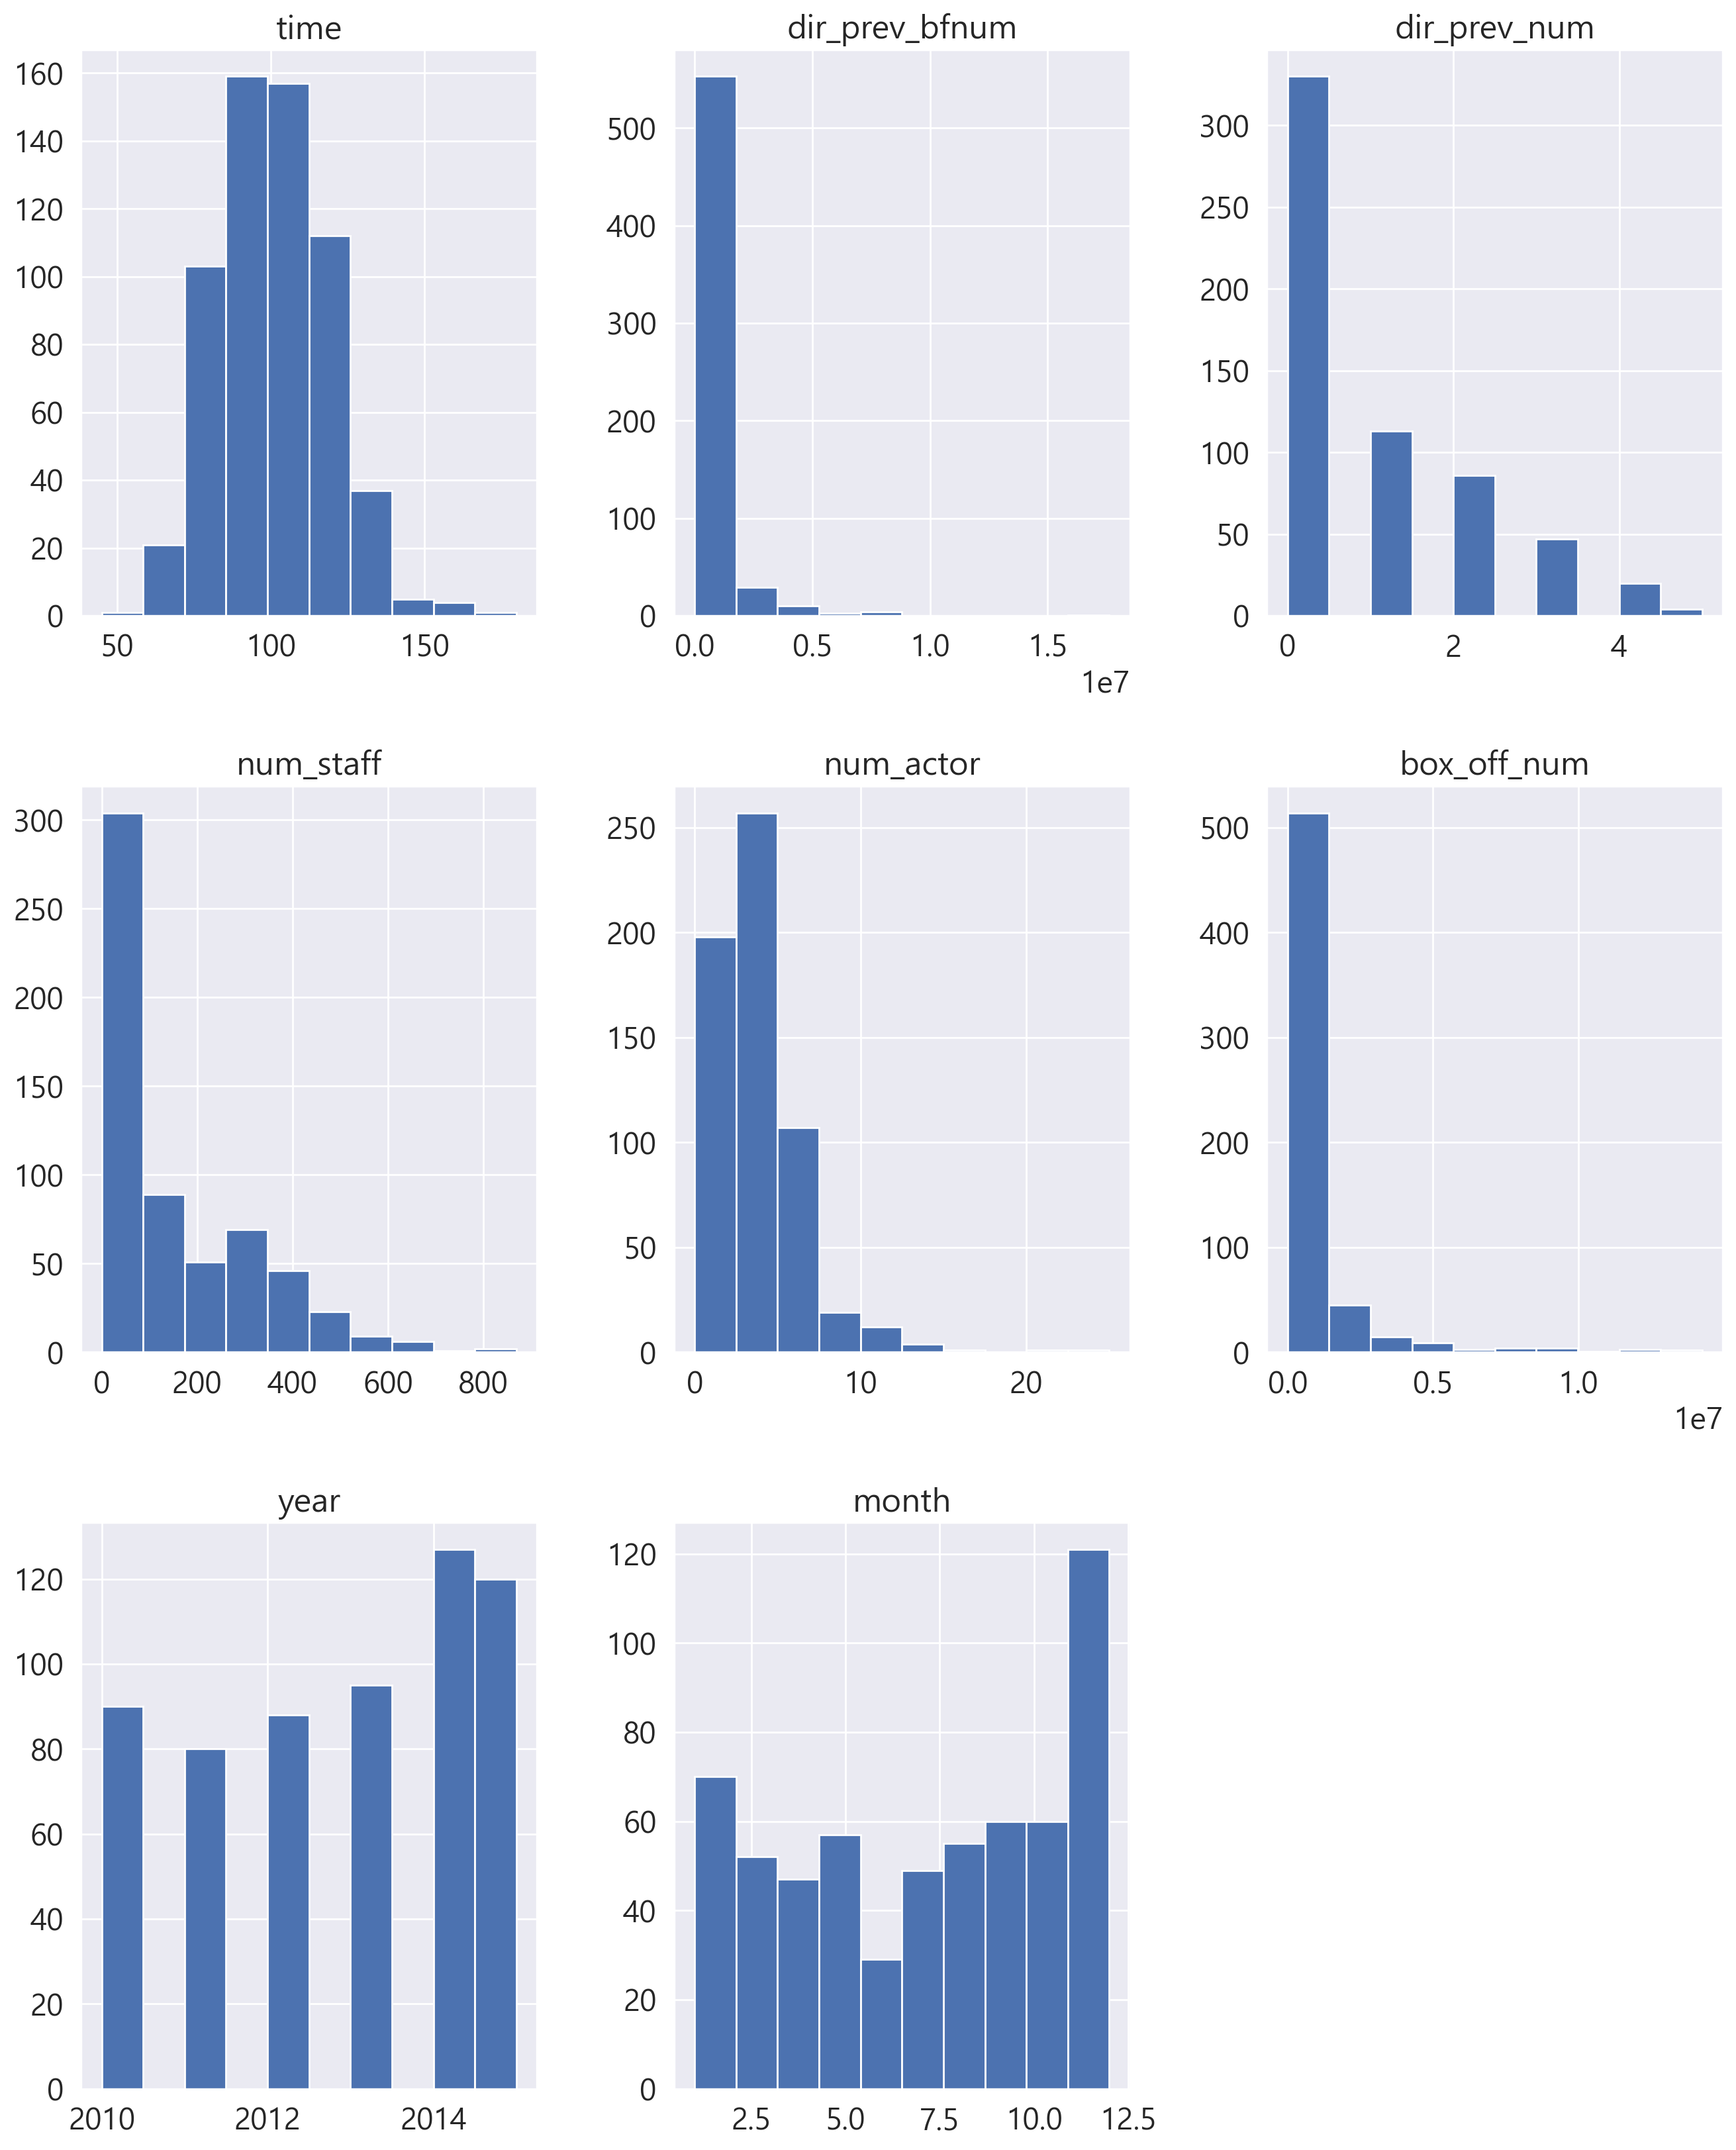

In [112]:
# numerical features
numerical_columns = ['time','dir_prev_bfnum', 'dir_prev_num' ,'num_staff', 'num_actor','box_off_num','year','month']

fig = plt.figure(figsize=(16,20))
ax = fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

### 독립변수와 종속변수 간의 관계 탐색

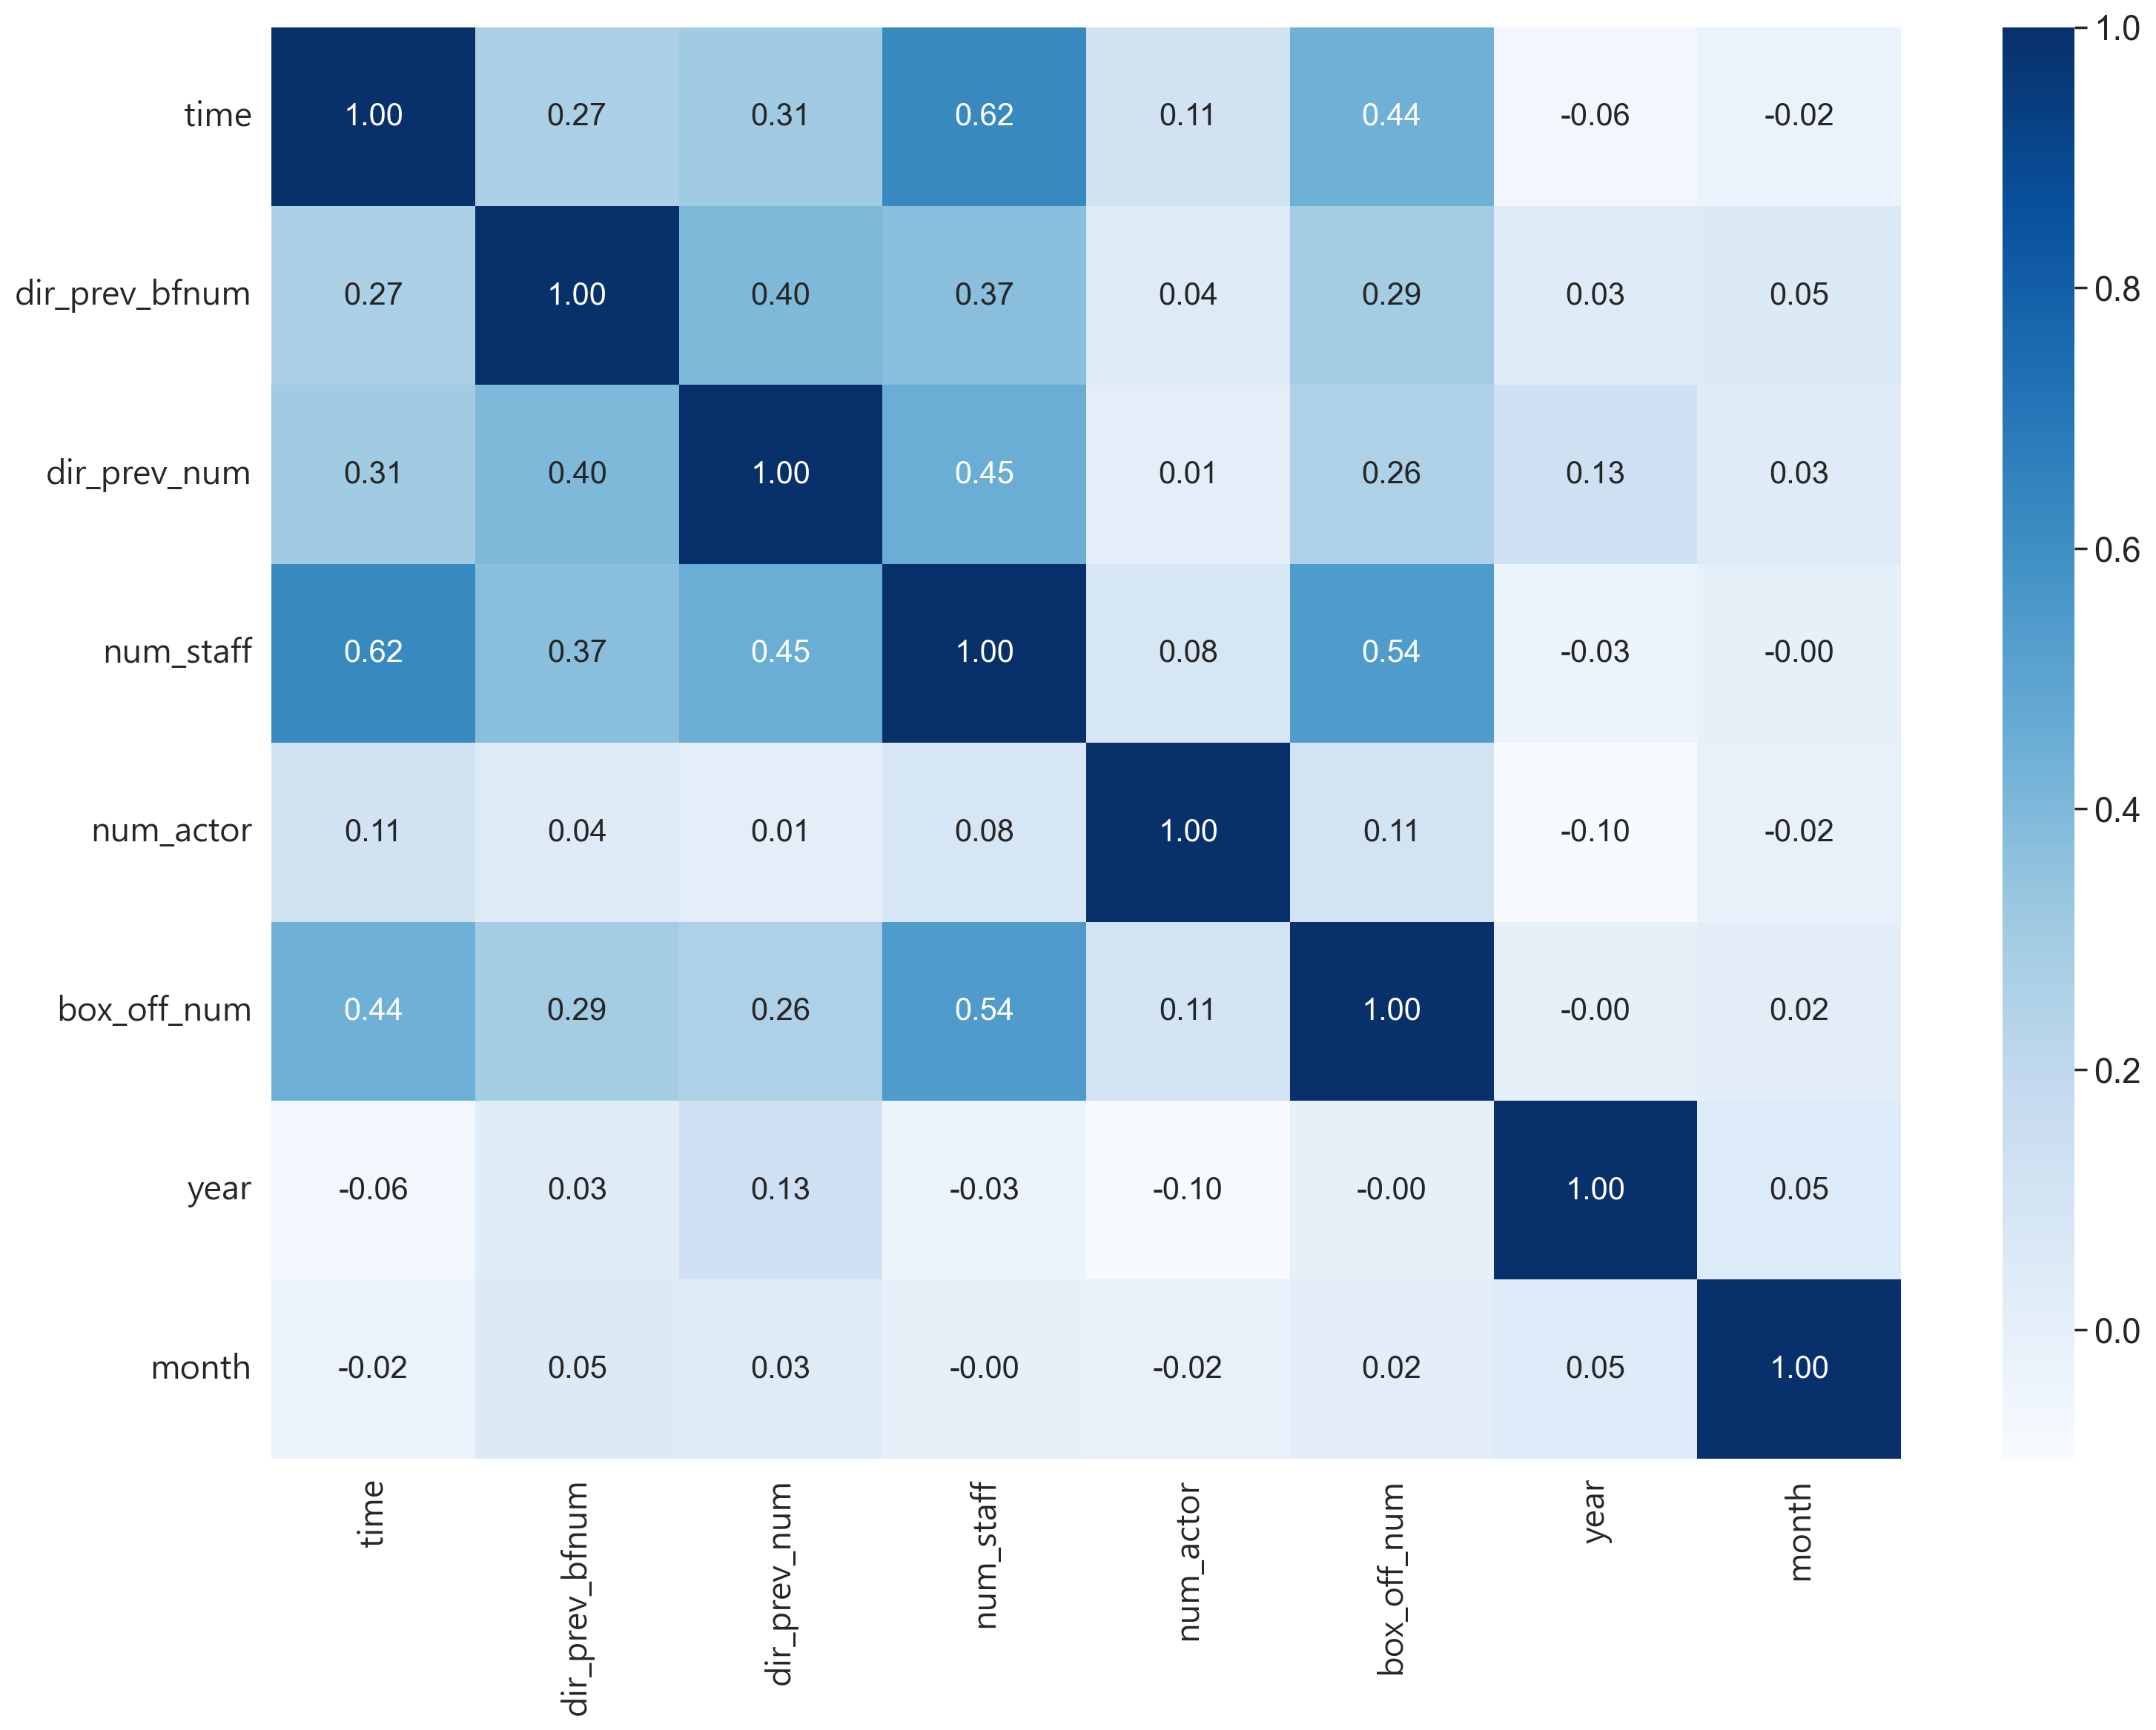

In [113]:
cols = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor','box_off_num','year','month']

corr = df[cols].corr(method='pearson')
fig = plt.figure(figsize=(16,12))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot=True, fmt = '.2f', annot_kws = {'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap='Blues')
plt.tight_layout()
plt.show()

In [114]:
## 종속변수와의 상관관계를 살펴보면
#  0.5를 넘는 것이 num_staff밖에 없어 양의 상관관계는 파악할 수 없다. 
# year가 -0.0인 것으로 보아 관객수에는 완전한 음의 상관관계이다. 

### 독립변수와 종속변수 간의 관계 탐색

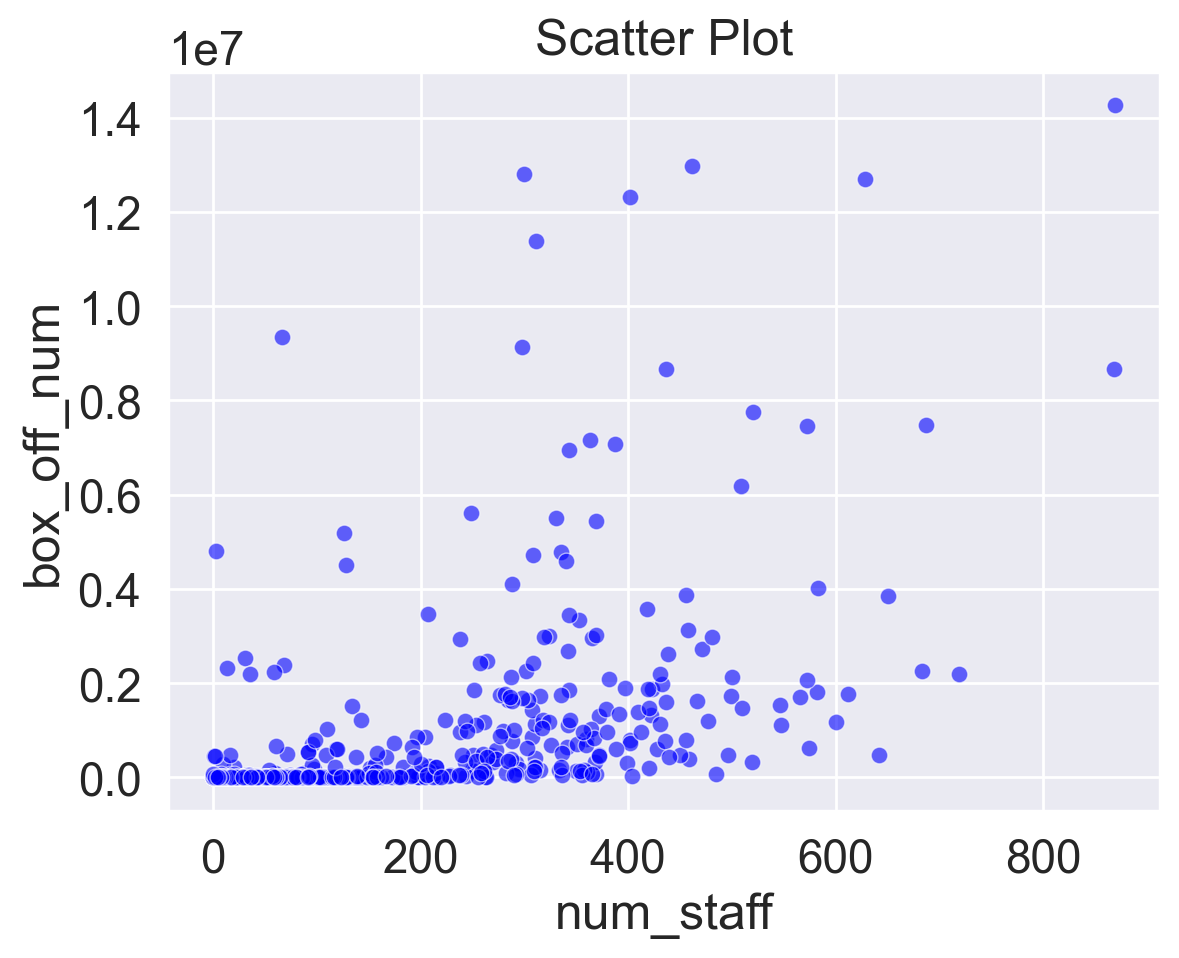

In [115]:
sns.scatterplot(data=df, x='num_staff', y='box_off_num',markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [116]:
## 영화 관객의 수와 num_staff는 상관관계를 갖고 있지 않다. 
# 즉 스태프의 숫자는 영화 관객의 수에 영향을 주지 않는다. 

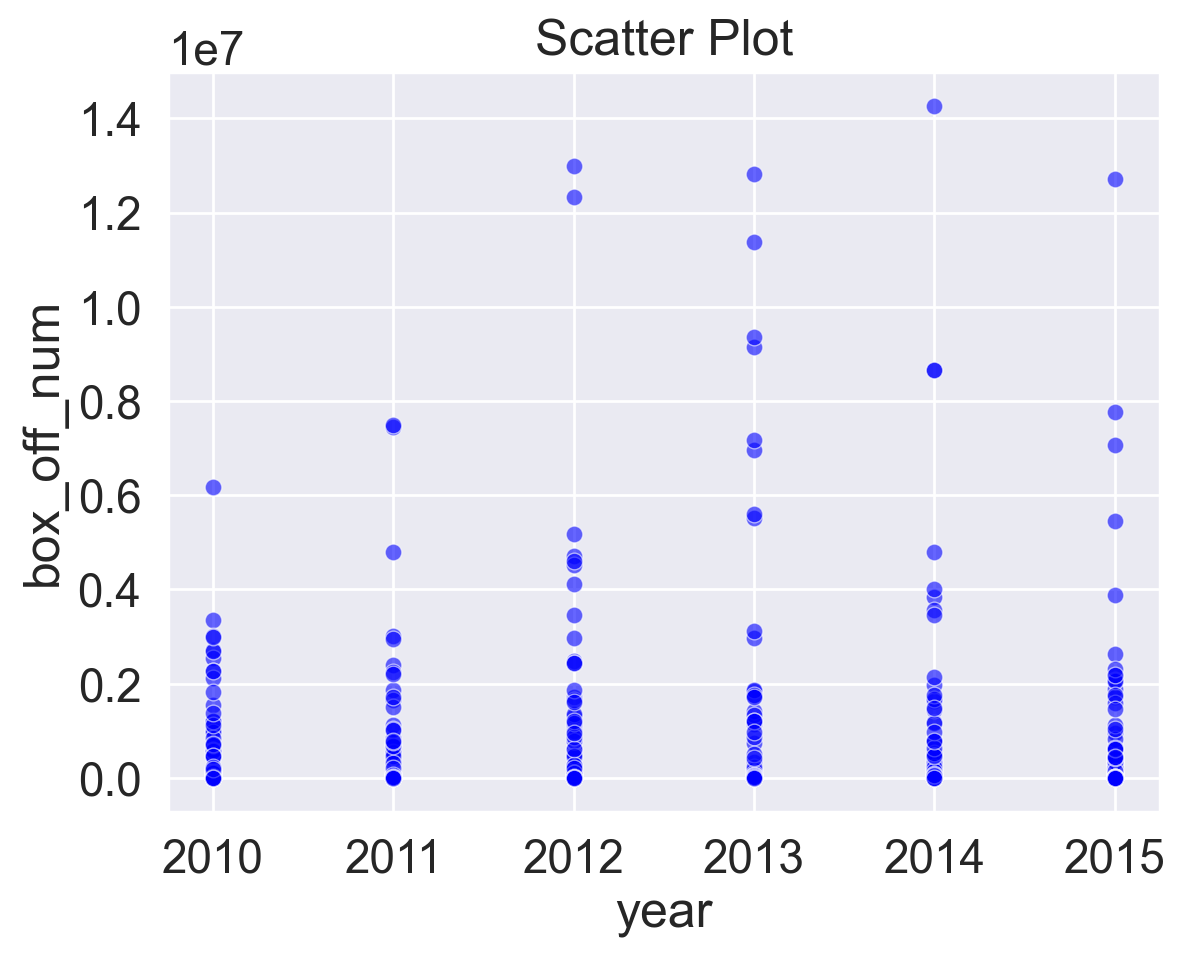

In [117]:
sns.scatterplot(data=df, x='year', y='box_off_num',markers='o', color='blue',alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [118]:
## year는 관객수에 영향을 미치지 않는다. 

### 장르별 차이 탐색
영화 관객 수에는 장르가 관련이 있다고 생각하기에 장르별 차이를 탐색한다. 
1. title : 영화 제목    
2. distributor: 배급사     
3. genre : 영화 장르         
4. release_time: 개봉일
5. time: 상영시간(분)            
6. screening_rat: 상영등급
7. director: 감독        
8. dir_prev_bfnum : 해당 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
9. dir_prev_num : 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
10. num_staff: 스태프 수       
11. num_actor: 배우 수    
12. box_off_num: 관객 수 

In [119]:
df[['genre','box_off_num']].groupby('genre').mean().sort_values(by='box_off_num')
# 느와르의 관객수가 가장 많다. 

,box_off_num
genre,
뮤지컬,6627.00000
다큐멘터리,67172.25806
서스펜스,82611.00000
애니메이션,181926.66667
멜로/로맨스,425968.03846
미스터리,527548.17647
공포,590832.52381
드라마,625689.79186
코미디,1193914.00000


In [120]:
# 그래프를 그리기 전 한글폰트 설정을 해준다. 
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_21548\714562975.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<Axes: xlabel='box_off_num', ylabel='genre'>

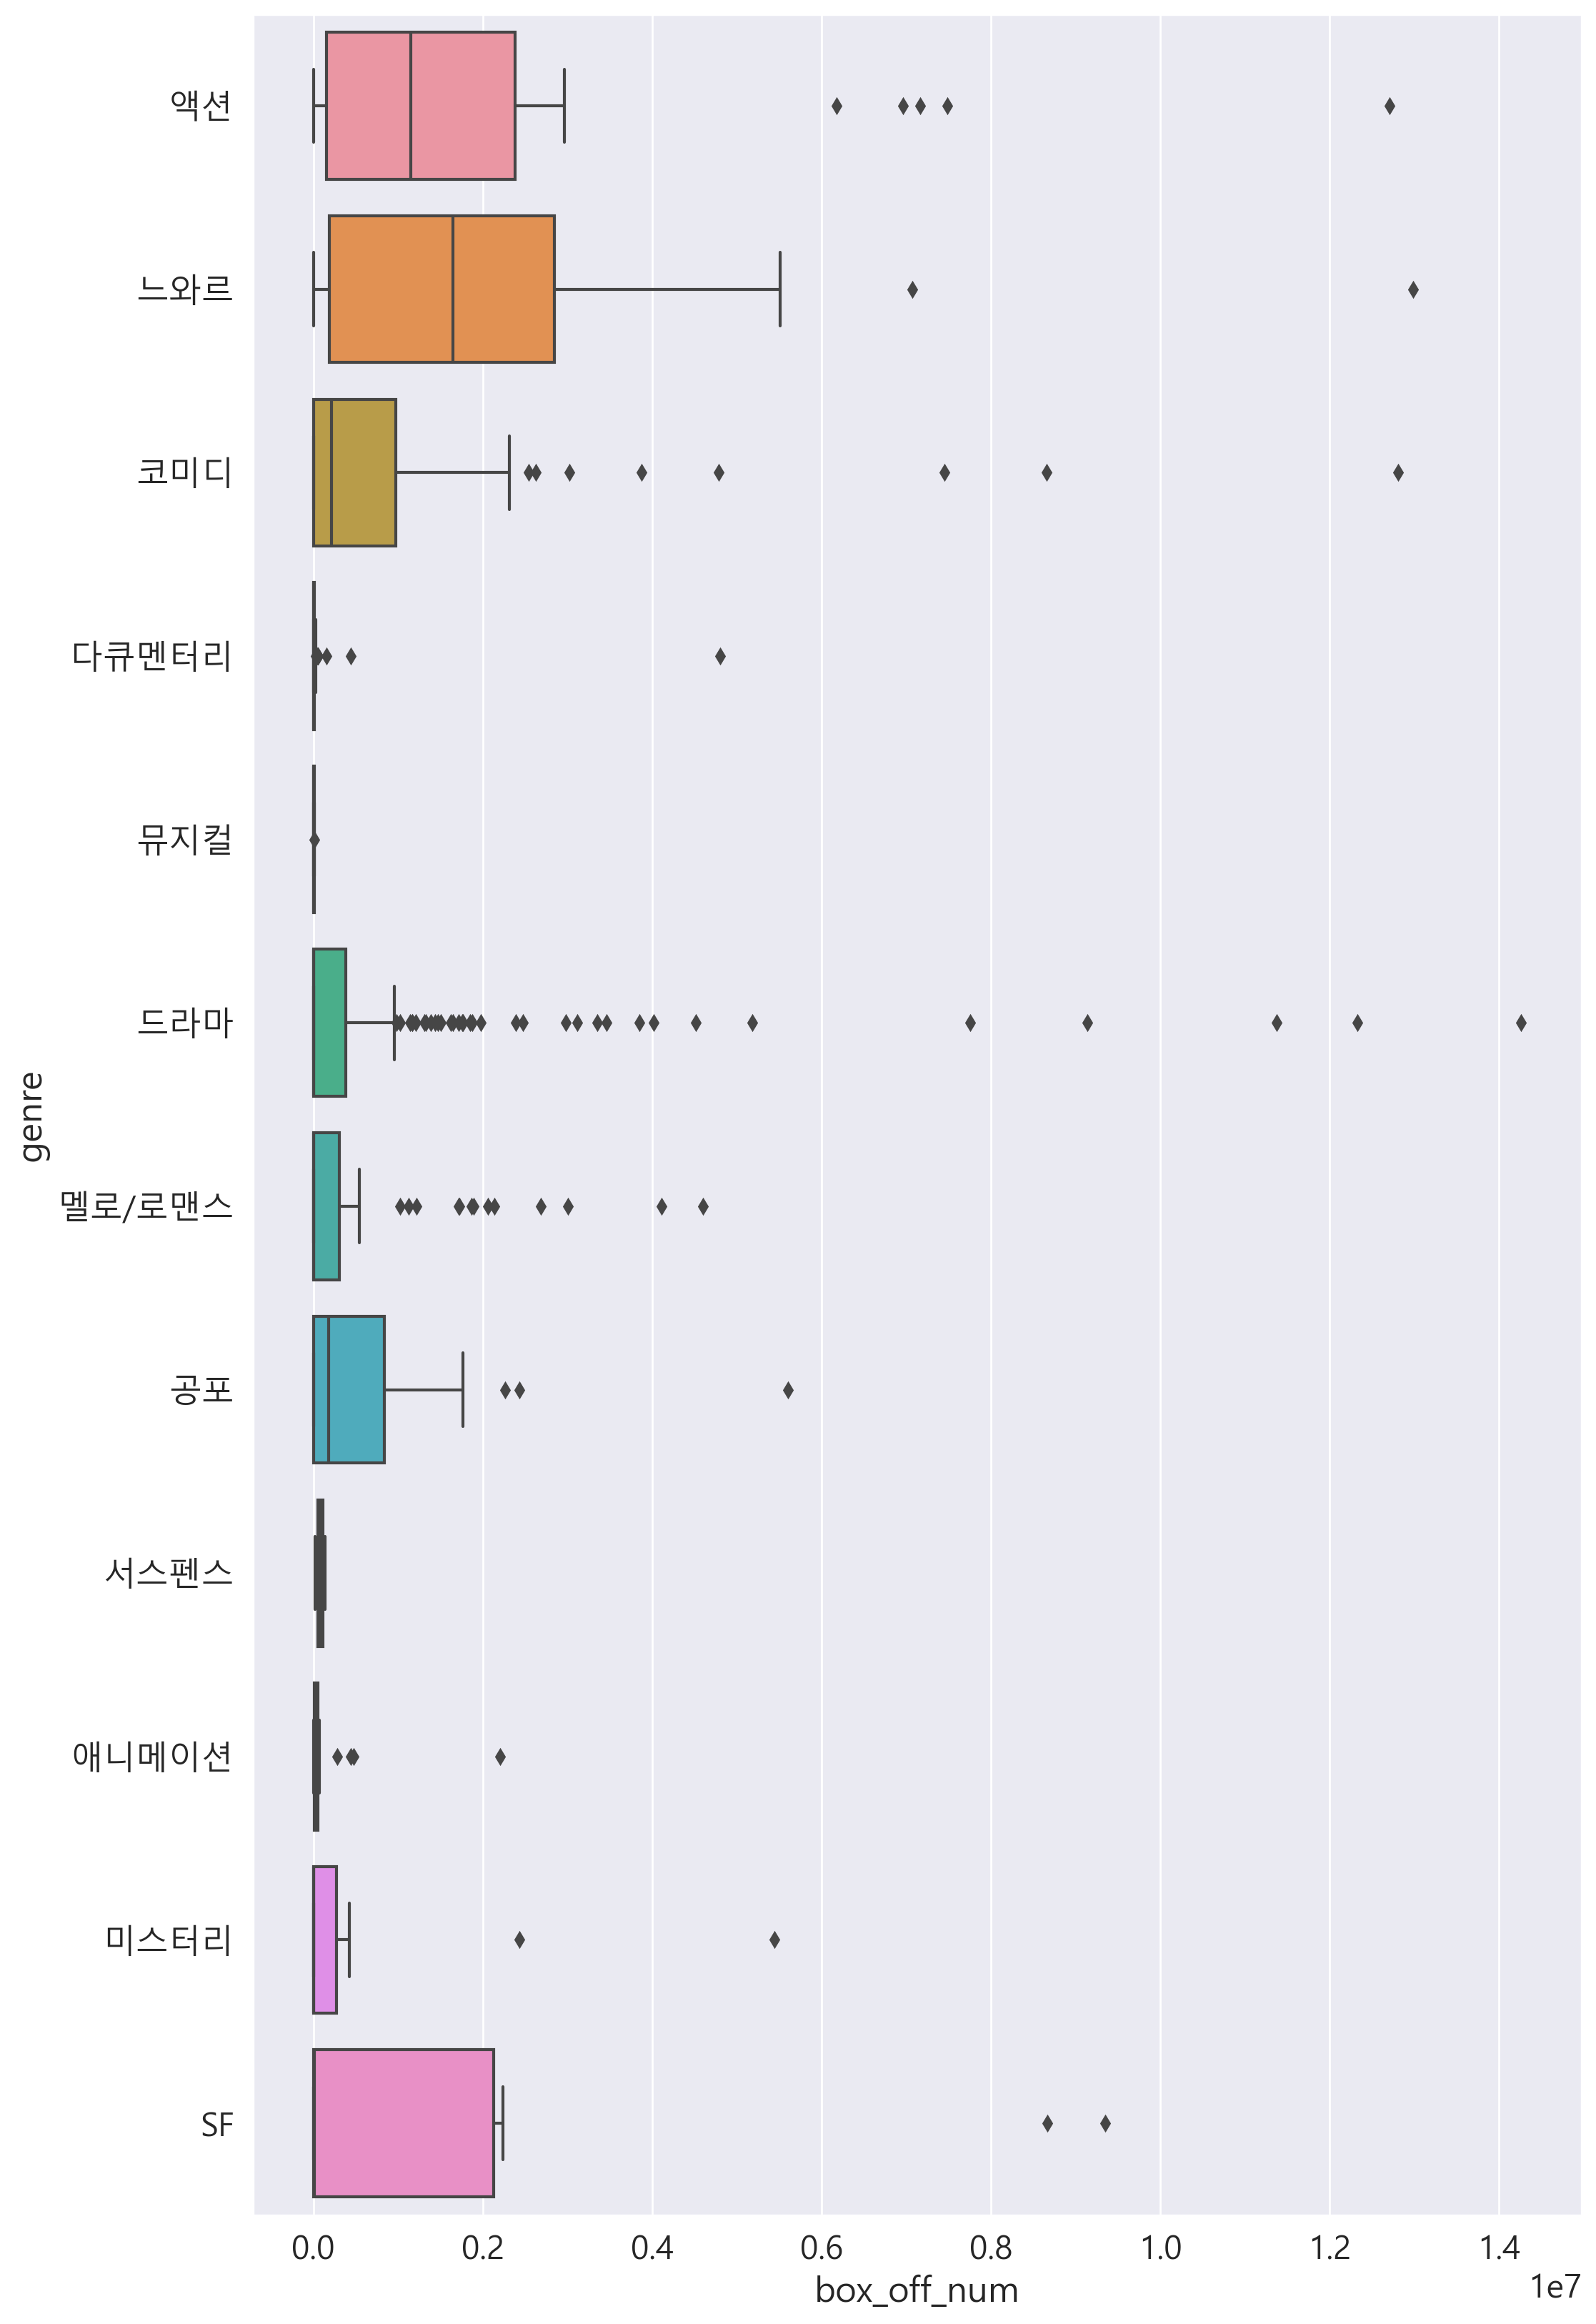

In [121]:
flg = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='genre', data=df)

In [122]:
## 다큐, 뮤지컬, 서스펜스, 애니메이션의 관객수는 상대적으로 적다.
# 느와르 장르를 많이 보는 것을 알 수 있다. 

<Axes: xlabel='dir_prev_num', ylabel='genre'>

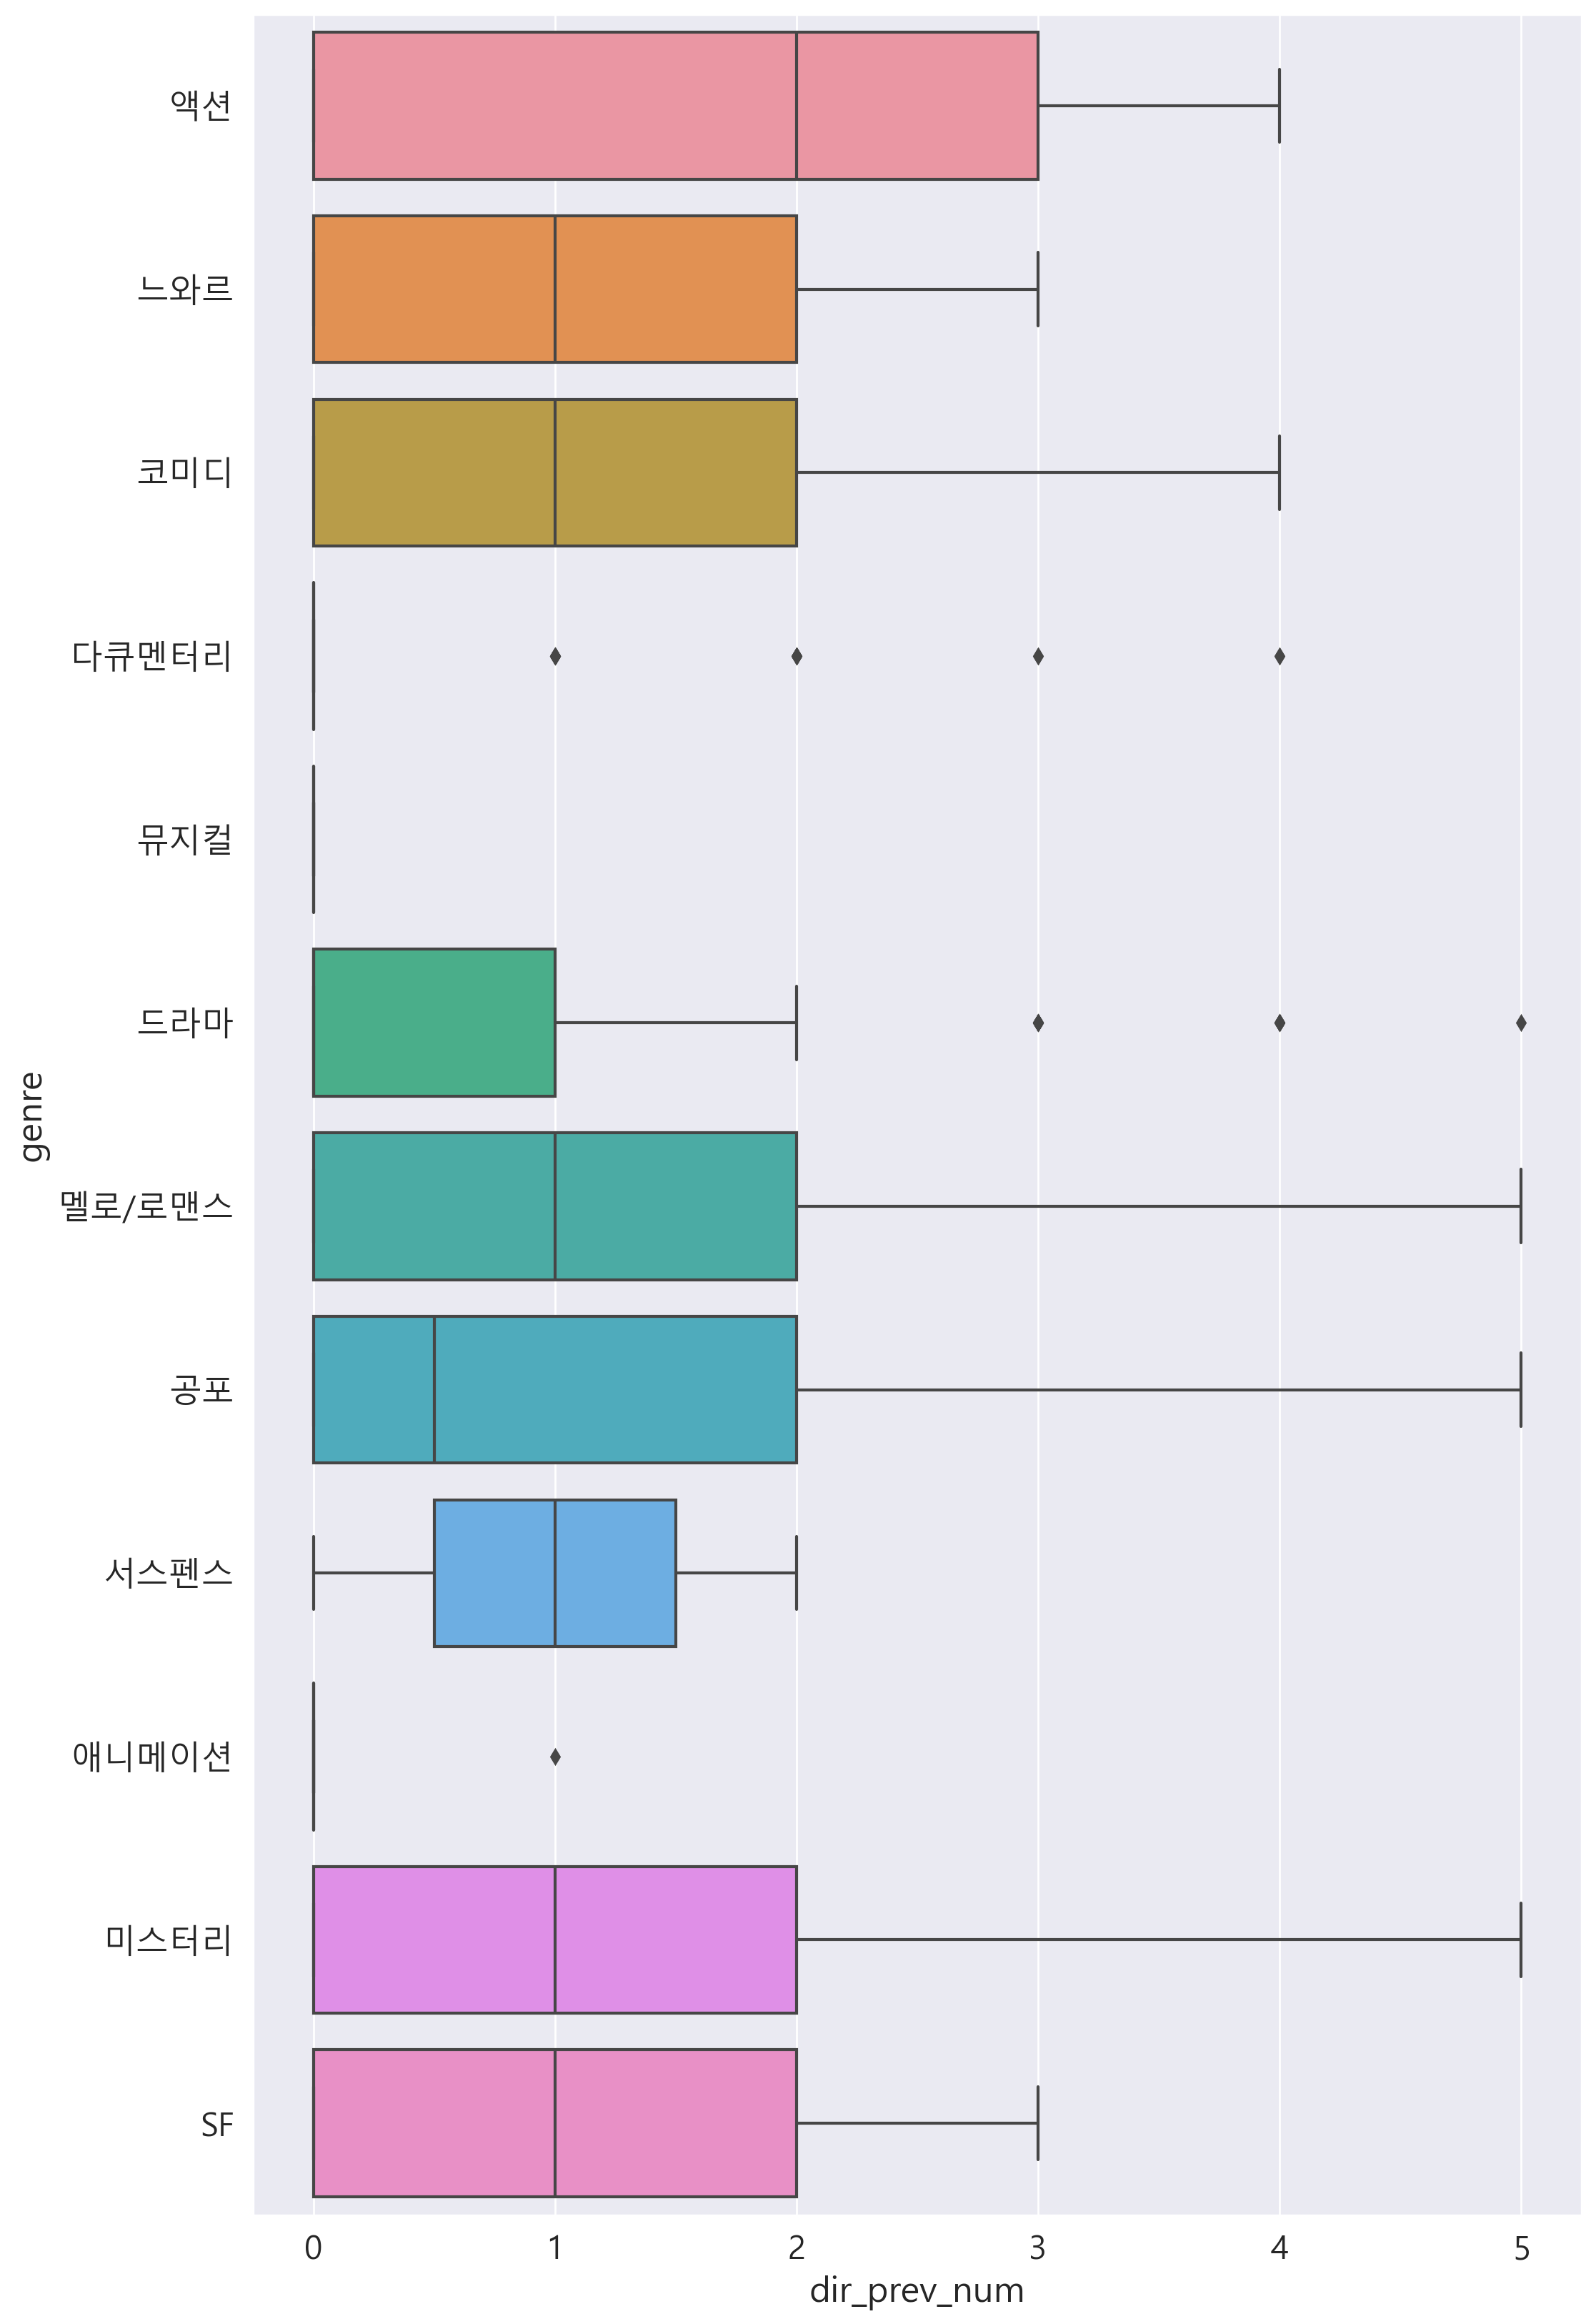

In [123]:
# 장르와 dir_prev_num의 특징을 살펴보겠다. 
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='dir_prev_num', y='genre',data=df)

In [124]:
## 만드는 것에 난이도가 높은 액션, 느와르, SF는 
## 영화를 제작하기 전 제작에 참여한 갯수가 높을 것 같았는데 예상이 맞았고, 
## 다큐, 뮤지컬, 애니메이션은 제작에 처음 참여한 감독이 많다. 
## 위의 그래프와 전의 그래프를 보아 새로운 신입감독이 제작을 하는 것은 관객수가 적은 것 같다.  

### 감독별 차이 탐색
- 영화를 선택할 때 감독이 누구인지도 많은 관련성이 있다고 생각하여 감독별 차이를 탐색하고자 한다. 

In [125]:
director = df['director'].unique()

In [126]:
print(len(director))
# director의 유효한 값이 너무 많아서 누적관객수 상위 20명의 감독만 보려고 한다. 

472


In [127]:
director = df[['director', 'title', 'box_off_num']].sort_values(by='box_off_num')

In [128]:
director_top20 = director.groupby('director').sum()['box_off_num'].sort_values(ascending=False).head(20)
director_top20 = director_top20.reset_index()
director_top20

,director,box_off_num
0,최동훈,25690504
1,이석훈,16425919
2,윤제균,14262766
3,추창민,13973002
4,이환경,13347092
5,우민호,11480550
6,강형철,11469079
7,양우석,11374879
8,류승완,9889560
9,봉준호,9350351


<Axes: xlabel='box_off_num', ylabel='director'>

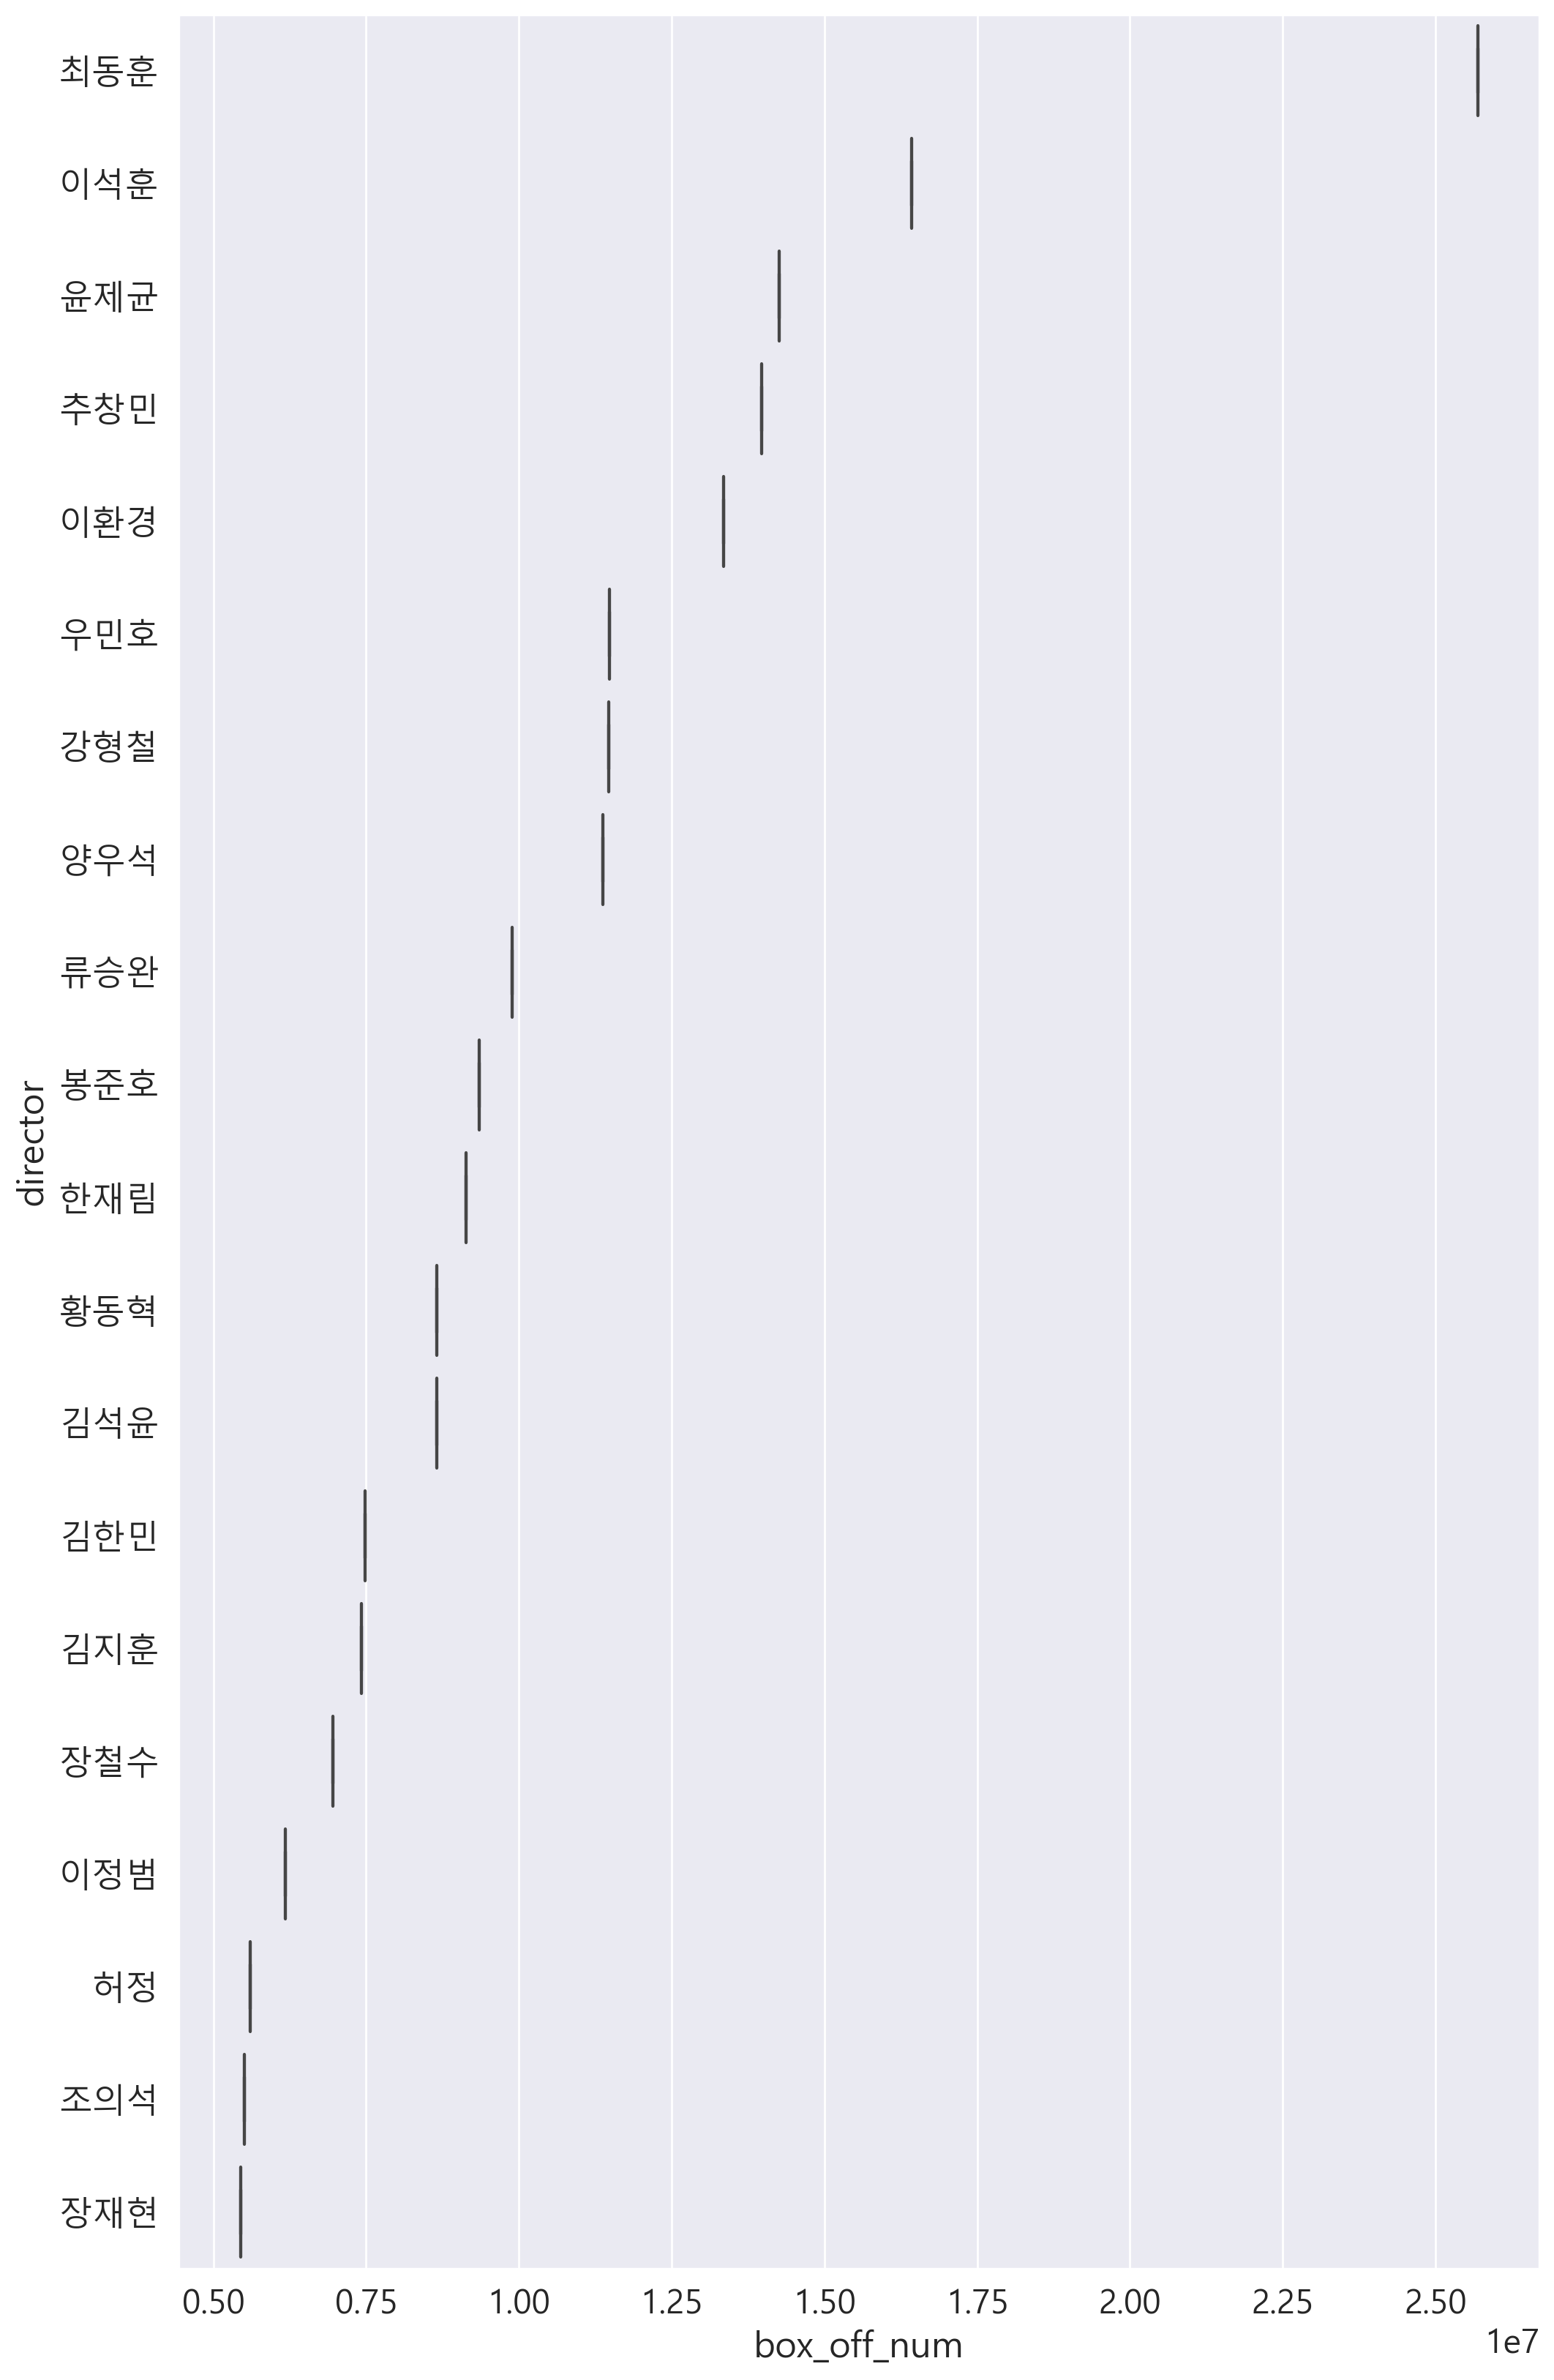

In [129]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='director', data=director_top20)

In [130]:
director_top20_movie = df.loc[df['director'].isin(director_top20['director']),:]
director_top20_movie['title'] = director_top20_movie['title'] + '(' + director_top20_movie['director'] + ')'
director_top20_movie.head()

C:\Users\ahneunjeong\AppData\Local\Temp\ipykernel_21548\3135660612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_top20_movie['title'] = director_top20_movie['title'] + '(' + director_top20_movie['director'] + ')'


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
1,내부자들(우민호),(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게(장철수),(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6
16,써니(강형철),CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.00000,1,572,11,7453715,2011,5
44,부당거래(류승완),CJ 엔터테인먼트,느와르,2010-10-28,119,청소년 관람불가,류승완,0.00000,0,471,4,2723028,2010,10
58,파괴된 사나이(우민호),시너지,공포,2010-07-01,114,청소년 관람불가,우민호,0.00000,0,290,5,1012310,2010,7


<Axes: xlabel='box_off_num', ylabel='title'>

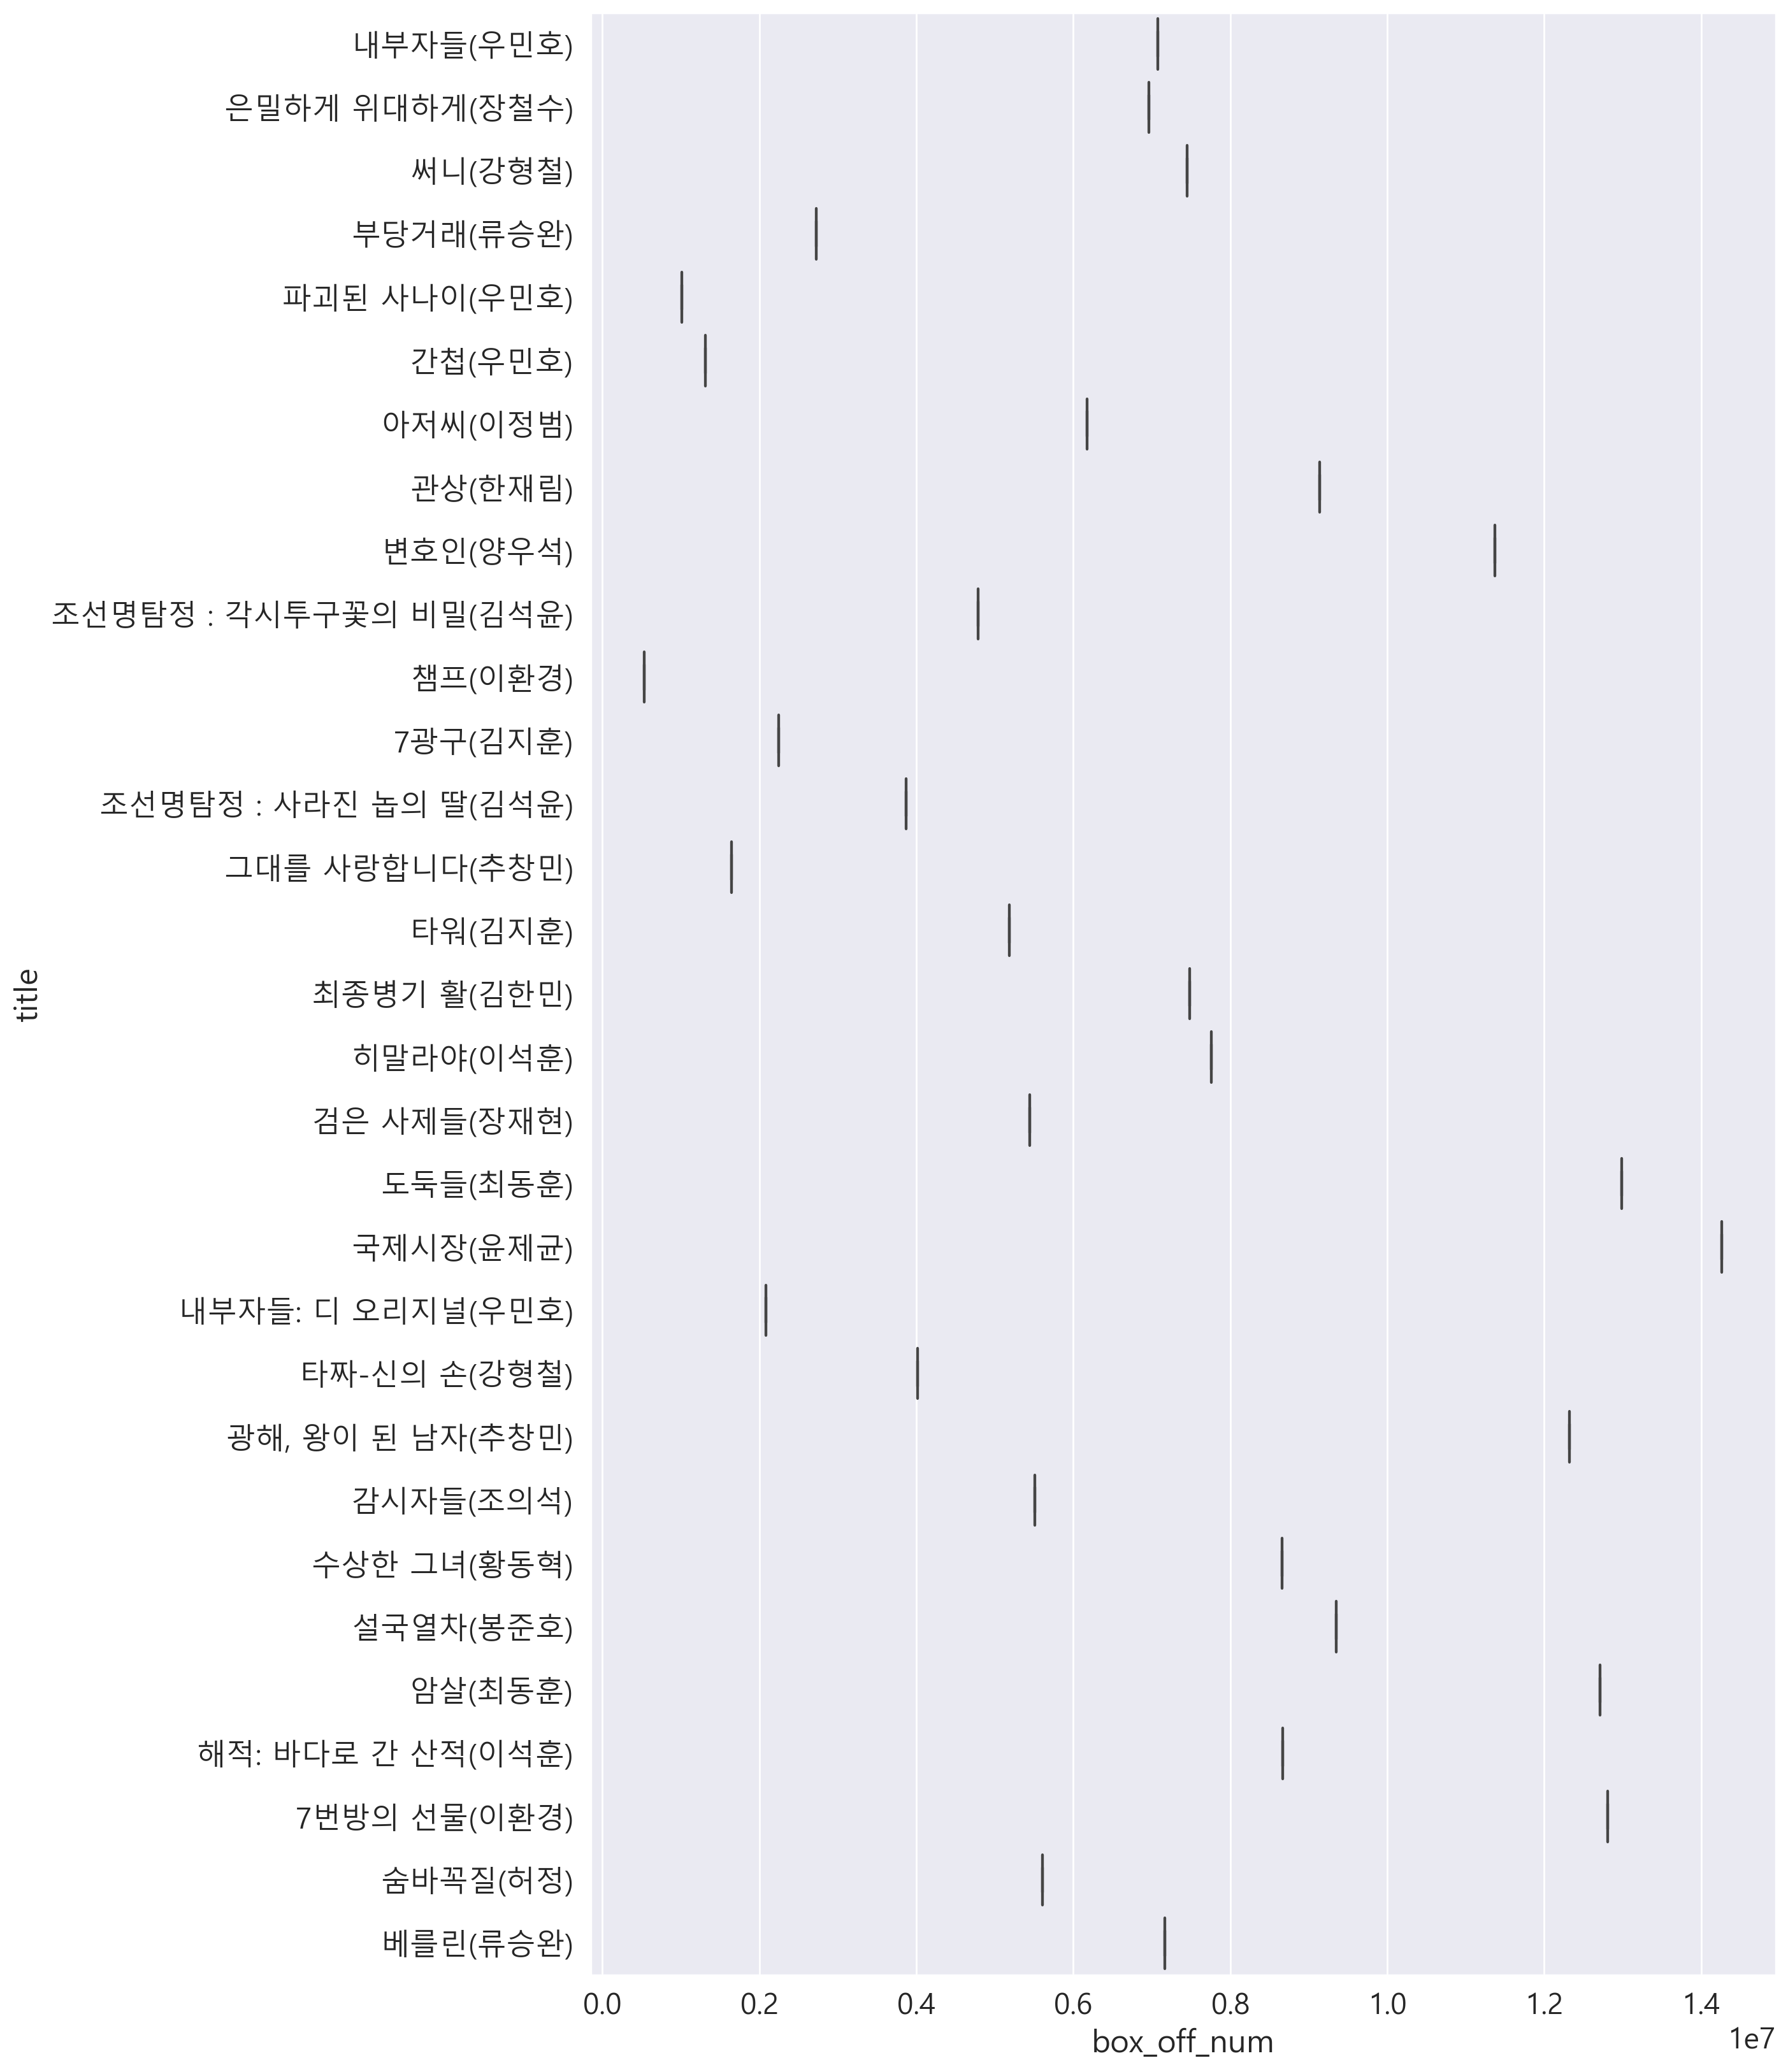

In [131]:
fig = plt.figure(figsize=(12,20))
sns.boxplot(x='box_off_num', y='title', data=director_top20_movie)

In [132]:
## 암살과 도둑들의 감독인 최동훈의 영화는 관객수가 많았다. 

In [133]:
# 관객수 상위 20% 감독들이 만든 영화는 전체적으로 관객수가 많았다. 
# 그러나 같은 감독임에도 관객수가 많은 영화, 아닌 영화가 있기에 큰 상관관계는 있다고 할 수 없다. 

## 관객수 예측 모델링

In [134]:
df.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00000,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083,2013,6


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  year            600 non-null    int64         
 13  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memo

### 데이터 전처리

In [136]:
df = df.drop(['director', 'title', 'distributor', 'release_time', 'screening_rat'],axis=1)

In [137]:
df.head(3)

,genre,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,액션,96,0.00000,0,91,2,23398,2012,11
1,느와르,130,1161602.50000,2,387,3,7072501,2015,11
2,액션,123,220775.25000,4,343,4,6959083,2013,6


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   dir_prev_bfnum  600 non-null    float64
 3   dir_prev_num    600 non-null    int64  
 4   num_staff       600 non-null    int64  
 5   num_actor       600 non-null    int64  
 6   box_off_num     600 non-null    int64  
 7   year            600 non-null    int64  
 8   month           600 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 42.3+ KB


#### 범주형 데이터를 더미변수로
영화 관객수에는 장르가 영향을 준다고 생각한다. 따라서 범주형 데이터는 'genre'를 드랍하지 않고, 더미변수로 전환해주고 분석을 진행하겠다. 

In [139]:
dummies =  pd.get_dummies(df['genre'])
dummies = dummies. astype(int)
df.drop('genre', axis=1, inplace=True)
df_dummies = pd.concat([df, dummies], axis=1)


In [140]:
df_dummies

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
0,96,0.00000,0,91,2,23398,2012,11,0,0,0,0,0,0,0,0,0,0,1,0
1,130,1161602.50000,2,387,3,7072501,2015,11,0,0,1,0,0,0,0,0,0,0,0,0
2,123,220775.25000,4,343,4,6959083,2013,6,0,0,0,0,0,0,0,0,0,0,1,0
3,101,23894.00000,2,20,6,217866,2012,7,0,0,0,0,0,0,0,0,0,0,0,1
4,108,1.00000,1,251,2,483387,2010,11,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,3833.00000,1,510,7,1475091,2014,8,0,0,0,0,1,0,0,0,0,0,0,0
596,127,496061.00000,1,286,6,1716438,2013,3,0,0,0,0,1,0,0,0,0,0,0,0
597,99,0.00000,0,123,4,2475,2010,9,0,1,0,0,0,0,0,0,0,0,0,0
598,102,0.00000,0,431,4,2192525,2015,5,0,0,1,0,0,0,0,0,0,0,0,0


#### 표준화
- Feature들의 scale 차이를 없애기 위해 표준화를 진행한다
- 더미변수인 genre는 제외한다.  

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'year', 'month']
df_dummies[scale_columns] = scaler.fit_transform(df_dummies[scale_columns])

In [142]:
df_dummies[scale_columns].head(3)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,-0.26895,-0.36129,-0.74142,-0.36322,-0.69807,-0.43362,1.17585
1,1.61132,0.52653,0.95003,1.42512,-0.28904,1.30472,1.17585
2,1.22421,-0.19255,2.64147,1.15929,0.11998,0.14583,-0.29826


#### training/test set나누기

In [143]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('box_off_num', axis=1)
y = df_dummies['box_off_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [144]:
X_train.shape, y_train.shape

((480, 19), (480,))

In [145]:
X_test.shape, y_test.shape

((120, 19), (120,))

#### 다중공선성 판단

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif.round(1)

,features,VIF Factor
0,time,1.80000
1,dir_prev_bfnum,1.30000
2,dir_prev_num,1.40000
3,num_staff,2.20000
4,num_actor,1.10000
5,year,1.10000
6,month,1.00000
7,SF,1.00000
8,공포,1.00000
9,느와르,1.00000


In [147]:
## vif값을 확인해보면 모든 변수의 vif값이 다 10이하이다. 따라서 모든 feature를 활용하여 회귀 모델링을 진행하겠다.

### 회귀 모델링

In [148]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

In [149]:
coefs = pd.DataFrame(zip(df_dummies.columns, lr.coef_), columns = ['feature','coefficients'])
coefs

,feature,coefficients
0,time,321294.10287
1,dir_prev_bfnum,188813.11438
2,dir_prev_num,-51406.81492
3,num_staff,916176.58980
4,num_actor,22243.86773
5,box_off_num,44387.50248
6,year,28529.84226
7,month,-81901.38059
8,SF,-317930.23018
9,공포,843522.23182


In [150]:
## 값순으로 재정렬
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
15,미스터리,-1172512.85469
3,num_staff,916176.58980
9,공포,843522.23182
16,서스펜스,347940.72109
10,느와르,323034.37832
0,time,321294.10287
8,SF,-317930.23018
17,애니메이션,267788.71237
18,액션,207637.81278
1,dir_prev_bfnum,188813.11438


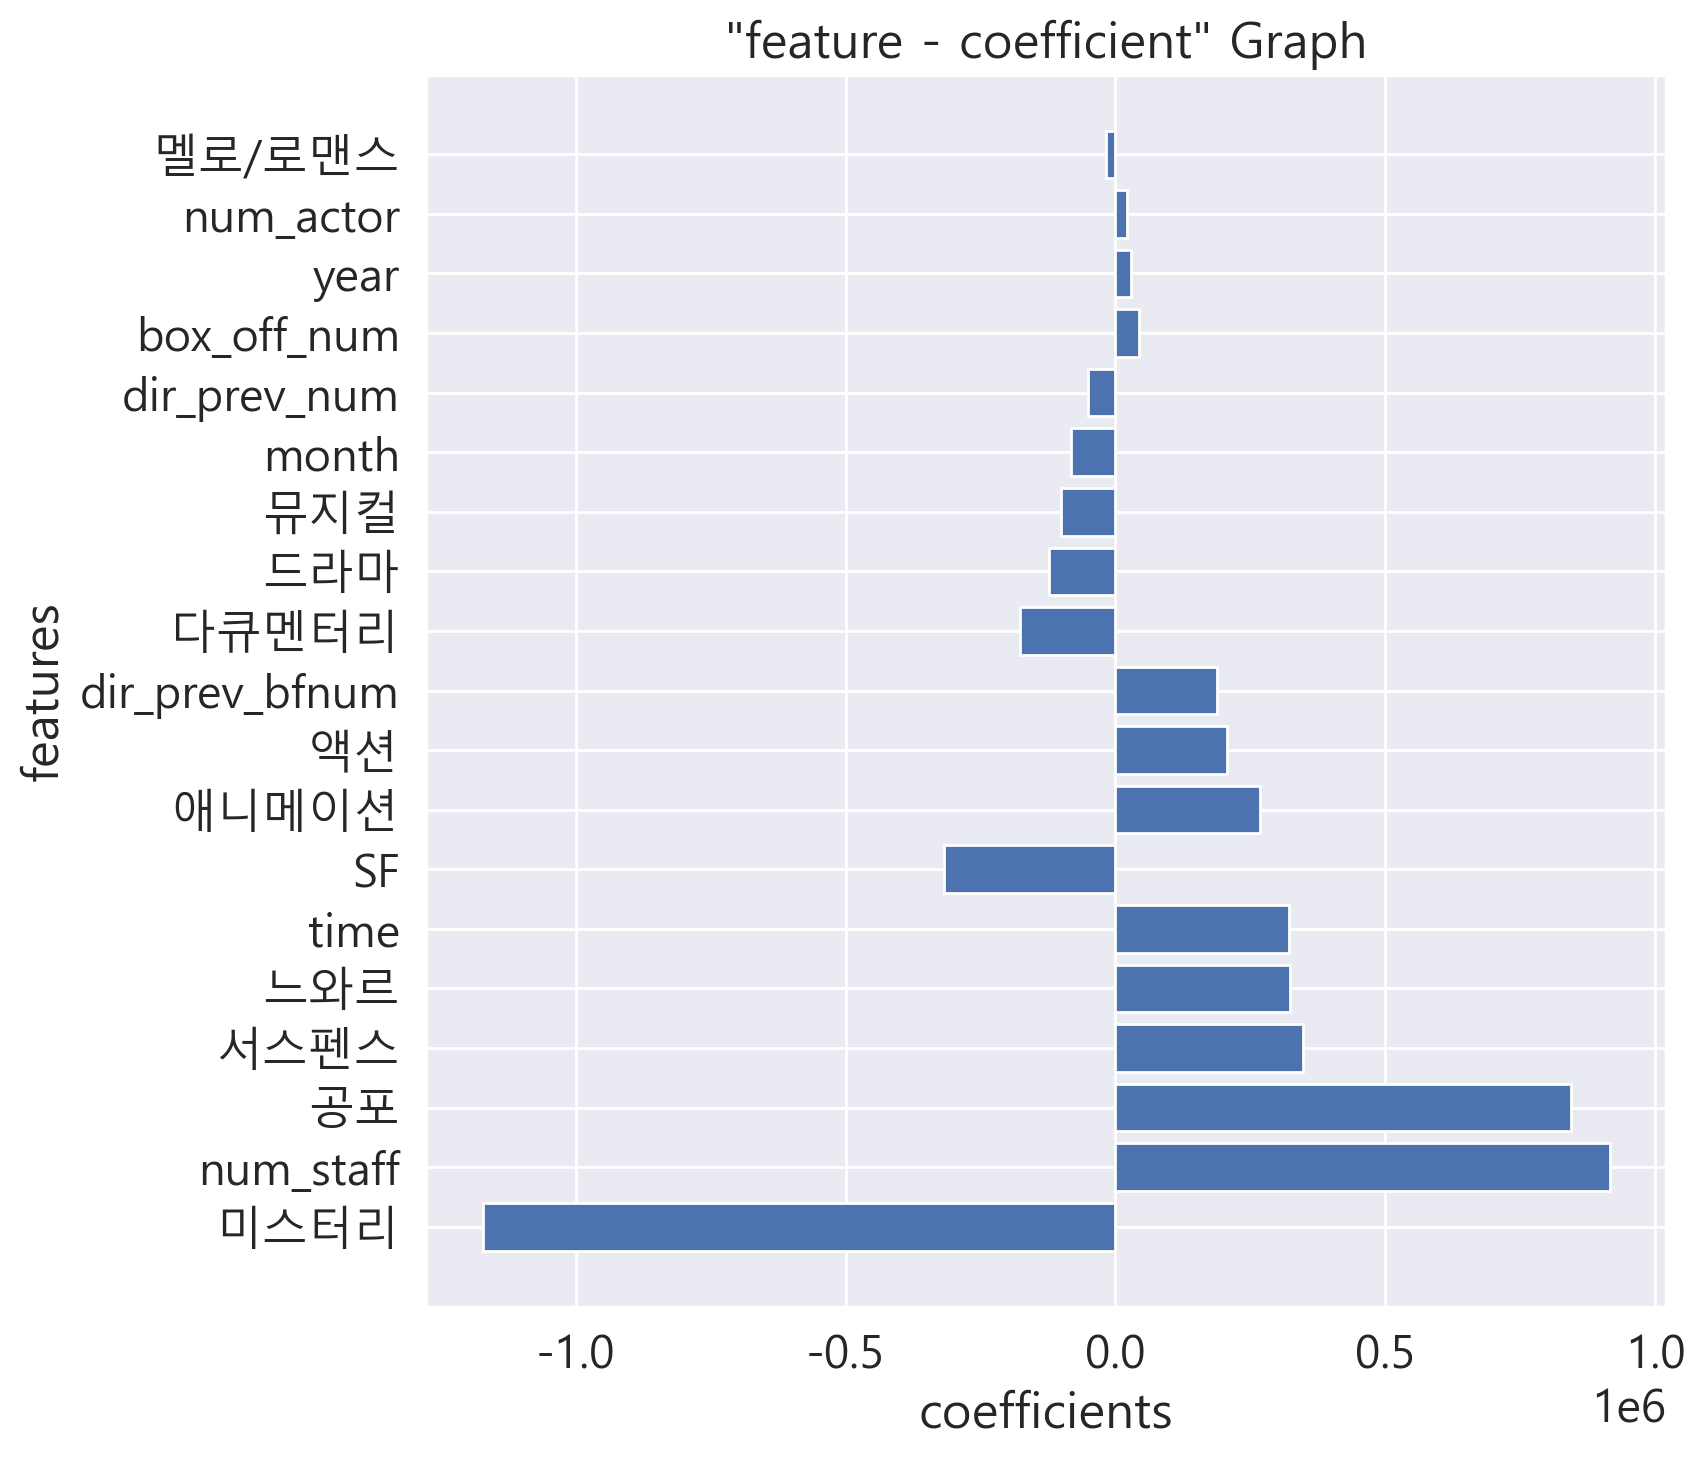

In [151]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

### 모델해설

#### 유의성 검정

In [152]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            box_off_num   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     15.76
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.09e-37
Time:                        15:52:34   Log-Likelihood:                -7521.3
No. Observations:                 480   AIC:                         1.508e+04
Df Residuals:                     461   BIC:                         1.516e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.991e+05   1.55e+05      4.508      0.000    3.94e+05       1e+06
time            3.213e+05   9.69e+04      3.317      0.001    1.31e+05    5.12e+05
dir_prev_bfnum  1.888e+05   7.68e+04      2.459      0.014    3.79e+04     3.4e+05
dir_prev_num   -5.141e+04   8.66e+04     -0.594      0.553   -2.22e+05    1.19e+05
num_staff       9.162e+05   1.07e+05      8.532      0.000    7.05e+05    1.13e+06
num_actor       2.224e+04   7.05e+04      0.316      0.753   -1.16e+05    1.61e+05
year            4.439e+04    7.3e+04      0.608      0.543    -9.9e+04    1.88e+05
month           2.853e+04   7.38e+04      0.387      0.699   -1.17e+05    1.74e+05
SF             -2.364e+04   5.14e+05     -0.046      0.963   -1.03e+06    9.87e+05
공포             -2.597e+05   2.89e+05     -0.899      0.369   -8.27e+05    3.08e+05
느와르             9.018e+05   3.71e+05      2.429      0.016    1.72e+05    1.63e+06
다큐멘터리           3.813e+05   2.39e+05      1.593      0.112    -8.9e+04    8.52e+05
드라마            -1.181e+05   1.91e+05     -0.619      0.536   -4.93e+05    2.57e+05
멜로/로맨스         -6.468e+04   2.44e+05     -0.265      0.791   -5.45e+05    4.15e+05
뮤지컬             4.136e+04   6.79e+05      0.061      0.951   -1.29e+06    1.38e+06
미스터리            -4.31e+04    4.2e+05     -0.103      0.918   -8.69e+05    7.83e+05
서스펜스           -1.114e+06   1.46e+06     -0.761      0.447   -3.99e+06    1.76e+06
애니메이션           4.062e+05      4e+05      1.015      0.311   -3.81e+05    1.19e+06
액션              3.261e+05   3.43e+05      0.951      0.342   -3.48e+05       1e+06
코미디             2.659e+05   2.78e+05      0.955      0.340   -2.81e+05    8.13e+05
==============================================================================
Omnibus:                      372.924   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6455.753
Skew:                           3.282   Prob(JB):                         0.00
Kurtosis:                      19.724   Cond. No.                     8.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 해설
우선 결정계수가 38%밖에 나오지 않아, 이 모델은 유용성이 낮다..
1. dir_prev_num, num_actor, year, month, SF, 공포, 드라마, 멜로/로맨스, 뮤지컬, 미스터리, 서스펜스, 애니메이션, 액션, 코미디는 p-value가 0.05를 넘어 유의하지 않다. 
2. positive변수 설명
    - time: 상영시간
    - dir_prev_bfnum: 감독이 이전에 제작했던 영화의 관객수
    - num_staff : 스태프들의 수
    - 느와르
3. negative 변수
    - 없음

#### 모델의 시각화

In [153]:
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,112,-80749.17525
1,158,-7653.19288
2,201,-433361.75390
3,205,-53020.26886
4,279,194233.09592


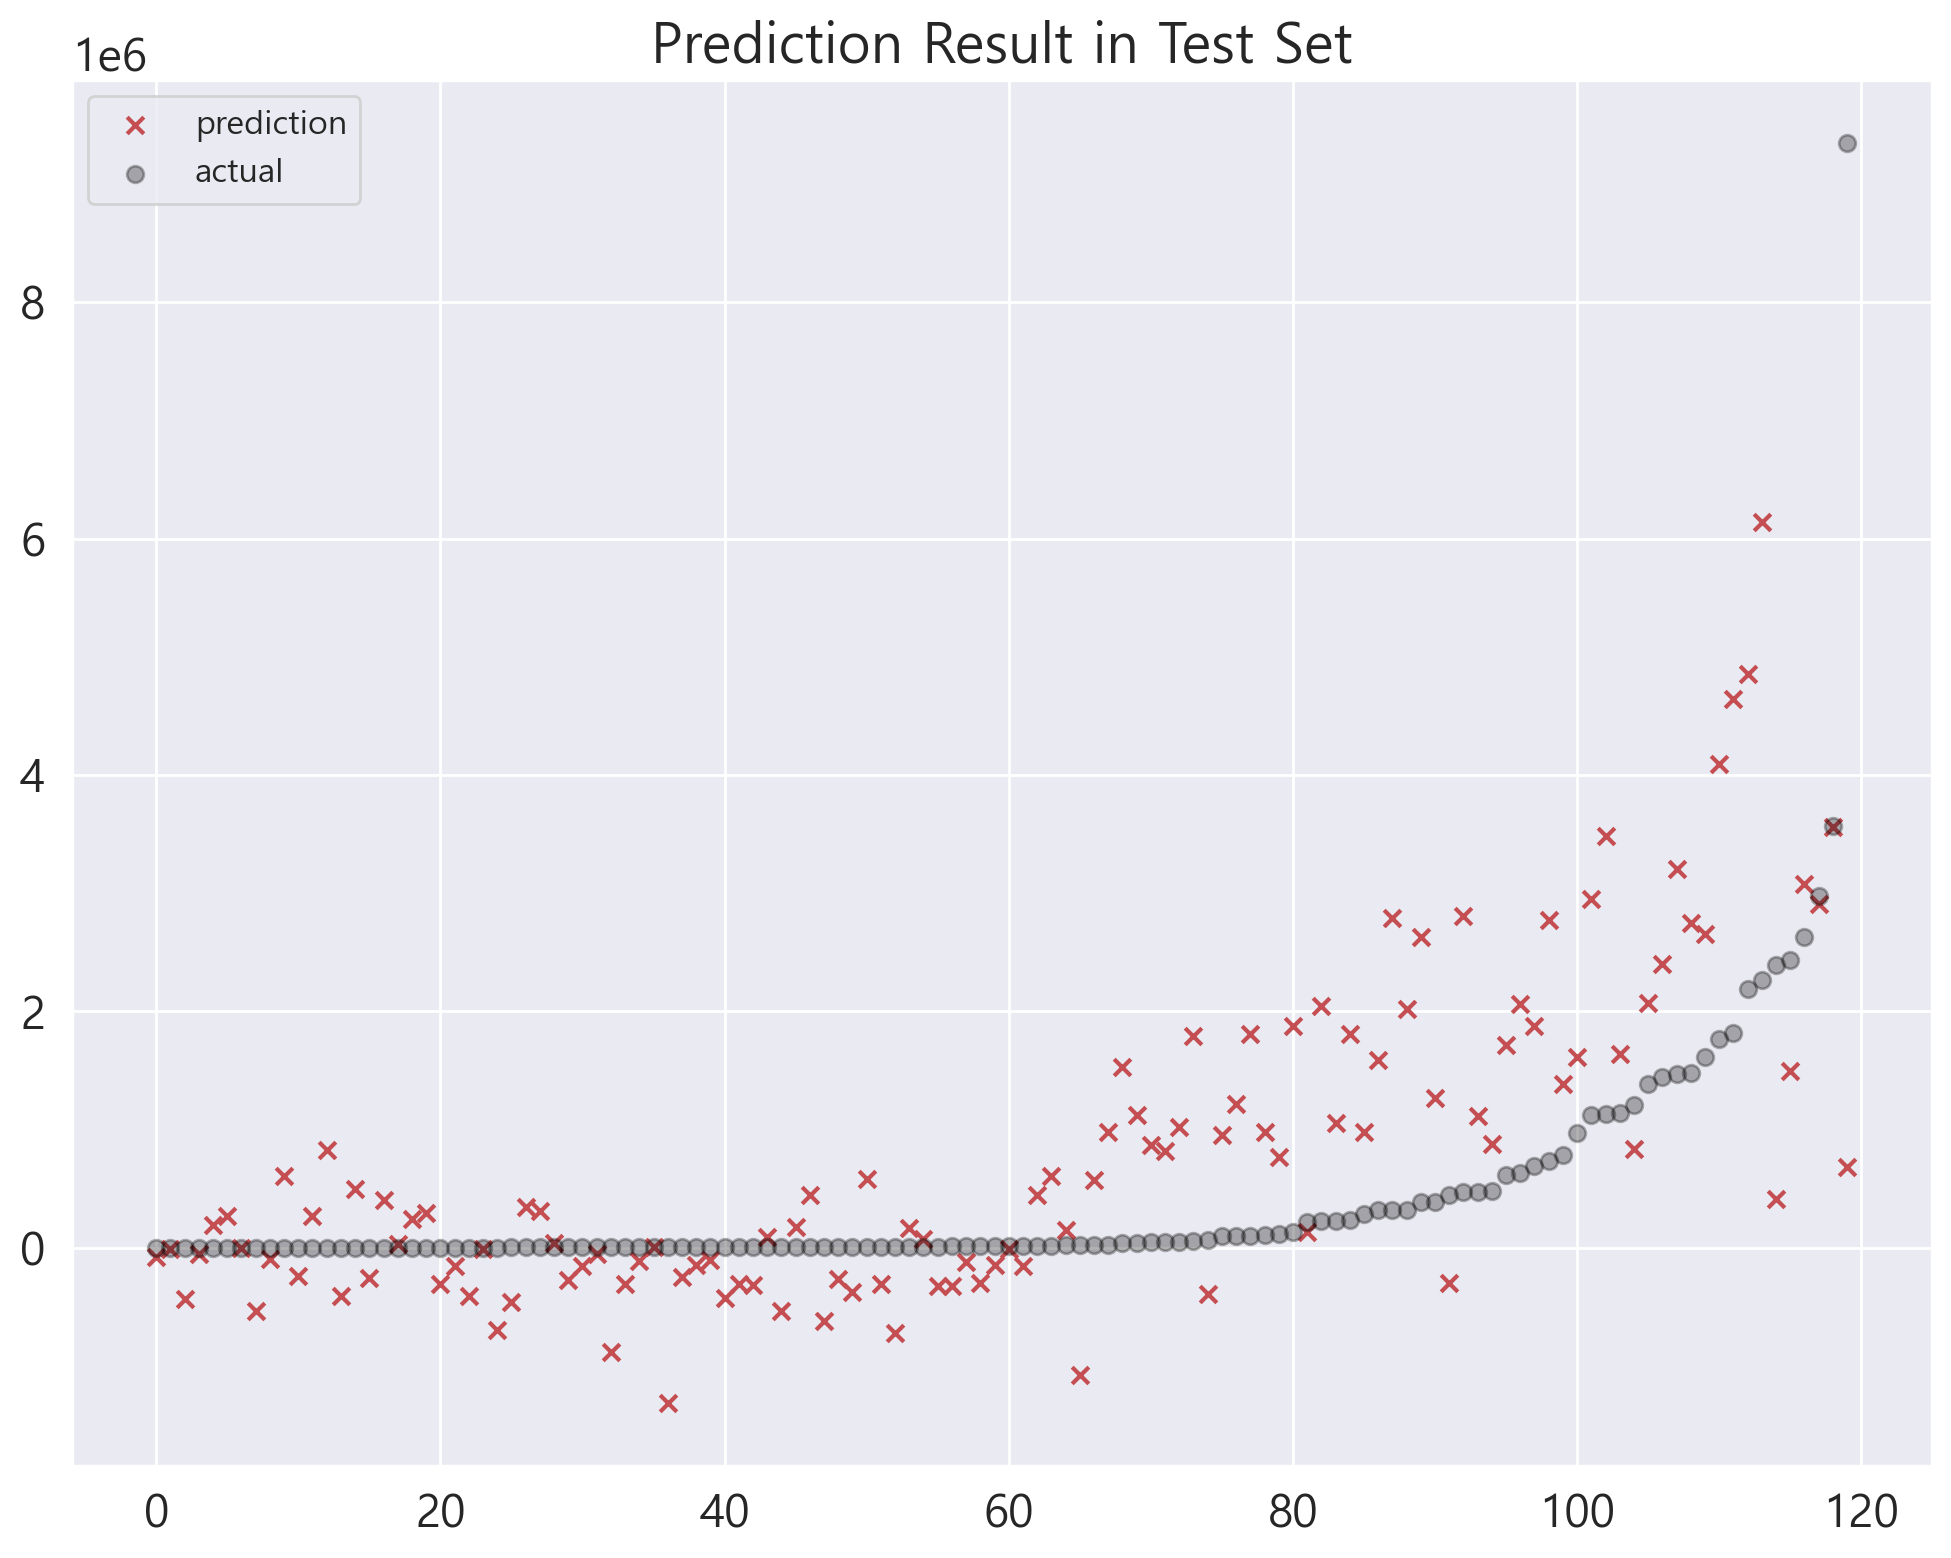

In [154]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [155]:
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test))

0.38089505880785524
-0.4318416495644859


In [156]:
# RMSE
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train))) 
# train error 구함

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))
# test error 구함

1544906.5426182372
1297485.689910567


# 해설
Test Set에서 해당 예측모델의 R- square가 -0.4이고, RMSE가 1,300,000이 나왔다..
따라서 이 모델은 성능이 좋지 않다. 
선형회귀 모델이 아닌 랜덤포레스트 같은 다른 모델을 적용해보고, 전처리를 다시 진행하는 것이 좋을 것 같다.
또한 영화감독도 더미변수로 변환하여 진행하려고 했으나 컬럼수가 너무 많아져 분석을 진행하는 것에 어려움을 느껴 위의 모델링 과정에서는 제외했다. 다음에 진행할 때는 영화감독도 함께 넣어 모델링을 진행하면 더 나은 결과가 나오지 않을까 싶다. 
또한 결정계수가 -0.4밖에 나오지 않았지만, 나온 결과를 바탕으로 해석을 하자면 X는 time(상영시간), num_prev_bfnum(감독이 이전에 제작했던 영화의 관객수), num_staff(스태프들의 수), 장르가 느와르인 것들이 y에 긍정적인 영향을 주었다.
부정적인 영향을 주는 것은 나오지 않았다. 